This notebook will demonstrate how to perform Exploratory Data Analysis (EDA) and Data Visualization on a Google Play Store App dataset.

Contents:

<ul>
<li><a href="#import-library">Import Library</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding the Dataset - EDA</a></li>
<li><a href="#research-queries">Research Queries and Analytical Insights</a></li>
</ul>
Hope you find it useful!

<a id='import-library'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Import Library</b></p>

- missingno: A visualization library for missing data that helps us understand patterns of missing values.
- plotly.express: A library used to create interactive plots and charts.
- folium: A library for visualizing data on maps.
- folium.plugins: Provides access to additional plugins for Folium.
- plt.rcParams["figure.figsize"] = (6,4): Sets the size of the plots generated using Matplotlib, with a width of 6 inches and a height of 4 inches.
- warnings.filterwarnings("ignore"): Used to ignore Python warnings, which prevents unnecessary warning messages during code execution.
- pd.set_option('display.max_columns', None): Ensures that all columns are displayed in a Pandas DataFrame output, with no column limit.
- pd.set_option('display.max_rows', None): Ensures that all rows are displayed in a Pandas DataFrame output, with no row limit.

In [1]:
# !pip install folium
# !pip install missingno

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Loading The Dataset</b></p>

**About the dataset**

The dataset we are examining contains various properties of applications on the Google Play Store. It includes a total of 10,841 rows and 13 columns.

<ul>
    <li><b>App:</b> The name of the application.</li>
    <li><b>Category:</b> The category of the application. Example categories include ART_AND_DESIGN, FINANCE, COMICS, BEAUTY, etc.</li>
    <li><b>Rating:</b> The average rating given by users (out of 5).</li>
    <li><b>Reviews:</b> The total number of user reviews the application has received.</li>
    <li><b>Size:</b> The size of the application in megabytes (MB).</li>
    <li><b>Installs:</b> The number of times the application has been downloaded from Google Play.</li>
    <li><b>Type:</b> Whether the application is free or paid.</li>
    <li><b>Price:</b> The price of the application, in US Dollars (USD). A price of 0 means it's free.</li>
    <li><b>Content Rating:</b> The content rating of the application. For example, "Everyone" indicates that it is suitable for all ages.</li>
    <li><b>Genres:</b> The genre or sub-categories of the application. For example, "Art & Design;Pretend Play" indicates two different types.</li>
    <li><b>Last Updated:</b> When the application was last updated. For example, "January 7, 2018."</li>
    <li><b>Current Ver:</b> The current version of the application. For example, "1.0.0."</li>
    <li><b>Android Ver:</b> The minimum Android version required to run the application. For example, "4.0.3 and up."</li>
</ul>


In [3]:
df0 = pd.read_csv('googleplaystore.csv') 
df = df0.copy()

<a id='understanding-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Understanding the dataset-EDA</b></p>

In [4]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

**Skimpy Library**

A Python library used for quickly and effectively summarizing datasets.

It displays basic statistics on a column-by-column basis, making it easier to understand the data and identify potential issues.

Skimpy provides a simple solution for data analysts, saving time when exploring and examining large datasets.

In [5]:
# pip install skimpy

In [6]:
from skimpy import skim

In [7]:
skim(df) 

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10841  │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %   ┃ mean     ┃ sd        ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Rating           │   1474 │   13.6 │    4.193 │    0.5374 │    1 │     4 │   4.3 │   4.5 │    19 │   ▂▇    │  │
│ └──────────────────┴────────┴────────┴──────────┴───────────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ App                           │      0 │          0 │                         3.9 │                  42584 │  │
│ │ Category                      │      0 │          0 │                           1 │                  10841 │  │
│ │ Reviews                       │      0 │          0 │                           1 │                  10841 │  │
│ │ Size                          │      0 │          0 │                         1.3 │                  14231 │  │
│ │ Installs                      │      0 │          0 │                           1 │                  10841 │  │
│ │ Type                          │      1 │       0.01 │                           1 │                  10840 │  │
│ │ Price                         │      0 │          0 │                           1 │                  10841 │  │
│ │ Content Rating                │      1 │       0.01 │                         1.1 │                  11759 │  │
│ │ Genres                        │      0 │          0 │                         1.4 │                  15450 │  │
│ │ Last Updated                  │      0 │          0 │                           3 │                  32521 │  │
│ │ Current Ver                   │      8 │       0.07 │                         1.3 │                  13929 │  │
│ │ Android Ver                   │      3 │       0.03 │                           3 │                  32514 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

**info() metodu,** provides basic information about a DataFrame. It is useful for quickly understanding the structure of a DataFrame.

- **RangeIndex:** Information about indexing, such as the start, stop, and step size.
- **Data columns:** The names of all columns, the number of non-null (non-missing) values, and the data type (dtype).
- **memory usage:** How much memory the DataFrame occupies.
- **dtypes:** The number of different data types (e.g., integer, float, object, etc.).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**df.columns**, is an attribute that returns the column names. When this attribute is used, it provides a list containing the names of the columns in the DataFrame.

Since spaces in column names are undesirable, it would be appropriate to replace these spaces with underscores (_) instead.

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**.str.replace(" ", "_"):** Reformats the column names by replacing spaces with underscores.

This helps in obtaining more user-friendly and manageable column names. It is a common practice to keep column names consistent and to make accessing columns easier.

In [10]:
df.columns = df.columns.str.replace(" ","_") 

In [11]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

**df.shape,** is an attribute that returns the dimensions (number of rows and columns) of a DataFrame.

When this attribute is used, it provides a tuple indicating how many rows and columns the DataFrame contains.

In [12]:
df.shape

(10841, 13)

**dtypes özelliği** shows the data type (dtype) of each column.

This attribute helps you quickly understand what types of data are present in your DataFrame.

In [13]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

**duplicated**

- The **duplicated** function is used to identify duplicate rows within a **pandas DataFrame**. This function returns a **Series** containing boolean values (True/False) indicating whether each row is duplicated or not.
- The function provides flexibility with the **keep** parameter:
  - **keep=first** (default): Marks all duplicates as **True** except for the first occurrence.
  - **keep=last**: Marks all duplicates as **True** except for the last occurrence.
  - **keep=False**: Marks all duplicates as **True**.







In [14]:
df.duplicated().sum() # Returns how many repeating data there are

483

**drop_duplicates**

- The **drop_duplicates** function is used to remove duplicate rows from a **DataFrame**. This function returns a DataFrame with duplicate rows removed.
- This function can also be used with the **keep** parameter:
  - **keep=first** (default): Removes all duplicates except for the first occurrence.
  - **keep=last**: Removes all duplicates except for the last occurrence.
  - **keep=False**: Removes all duplicates, meaning each unique combination appears only once.
- The **inplace** parameter determines whether the changes are made directly to the original DataFrame (**True** applies changes in place, while **False** does not modify the original DataFrame but returns the result as a new DataFrame).

In [15]:
df = df.drop_duplicates() # we removed the repetitive ones

In [16]:
pd.DataFrame({
    'Count': df.count(),
    'Null': df.isnull().sum(),
    'Cardinality': df.nunique()
})

Count  Null  Cardinality
App             10358     0         9660
Category        10358     0           34
Rating           8893  1465           40
Reviews         10358     0         6002
Size            10358     0          462
Installs        10358     0           22
Type            10357     1            3
Price           10358     0           93
Content_Rating  10357     1            6
Genres          10358     0          120
Last_Updated    10358     0         1378
Current_Ver     10350     8         2832
Android_Ver     10355     3           33

**df.isnull().sum()** code returns the count of missing (NaN or None) values for each column in a pandas DataFrame (named df).

This code is very useful during data cleaning and preprocessing stages, as it quickly shows which columns contain missing values.

In [17]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

**sns.set_theme():** Uses Seaborn's default theme settings. This ensures that all generated plots have a consistent appearance.

**sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)}):** This line adjusts the resolution and size of the generated plots.

**"figure.dpi": 300:** Sets the DPI (dots per inch) to 300, which provides higher resolution for the plots.

**"figure.figsize": (12, 9):** Sets the size of the generated plots to 12x9 inches.

In [18]:
sns.set_theme()

sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

The **sns.heatmap(df.isnull(), cbar=False)** code creates a heatmap to visualize where missing values (NaN or None) are located in a DataFrame.

The **cbar=False** parameter disables the display of the color bar.

**In this heatmap:**

- Missing values are shown in white or a light color.
- Other values are typically shown in black or a dark color.

This visualization is very useful for quickly seeing which columns and rows have a high concentration of missing values.

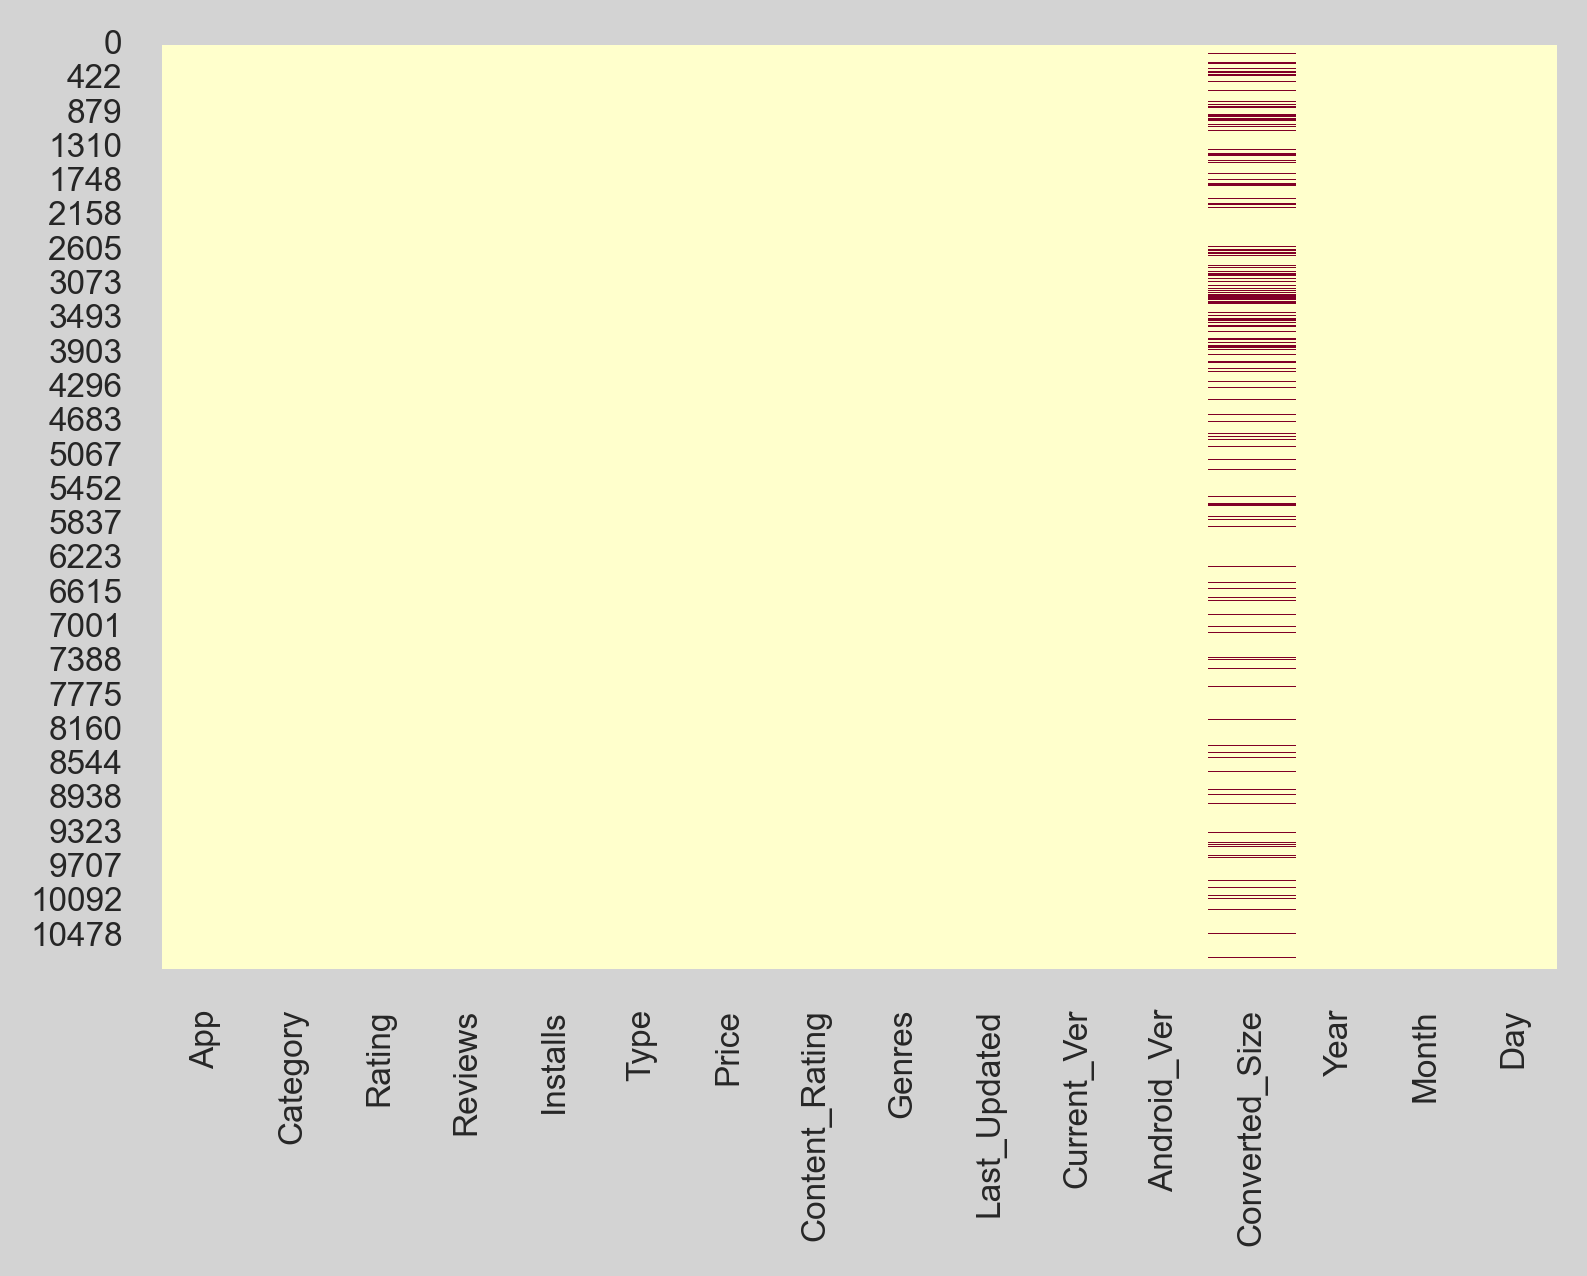

In [113]:
fig, ax = plt.subplots(figsize=(6, 4))  # Create a figure with a size of 6x4 inches
fig.patch.set_facecolor('lightgray')  # Set the background color of the figure

ax.tick_params(axis='x', labelsize=8)  # Set the font size of the x-axis labels
ax.tick_params(axis='y', labelsize=8)  # Set the font size of the y-axis labels

sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd');  # Create a heatmap of missing values with a 'YlOrRd' color map


The **msno.bar(df);** code uses the missingno library (often abbreviated as msno) to display missing values in the dataset as a bar chart.

Each bar represents a column, and the height of the bar shows the number of non-missing values in that column.

This type of visualization can help you quickly understand which columns have a high concentration of missing data.

Columns with missing values may require special attention during data cleaning or preprocessing stages.

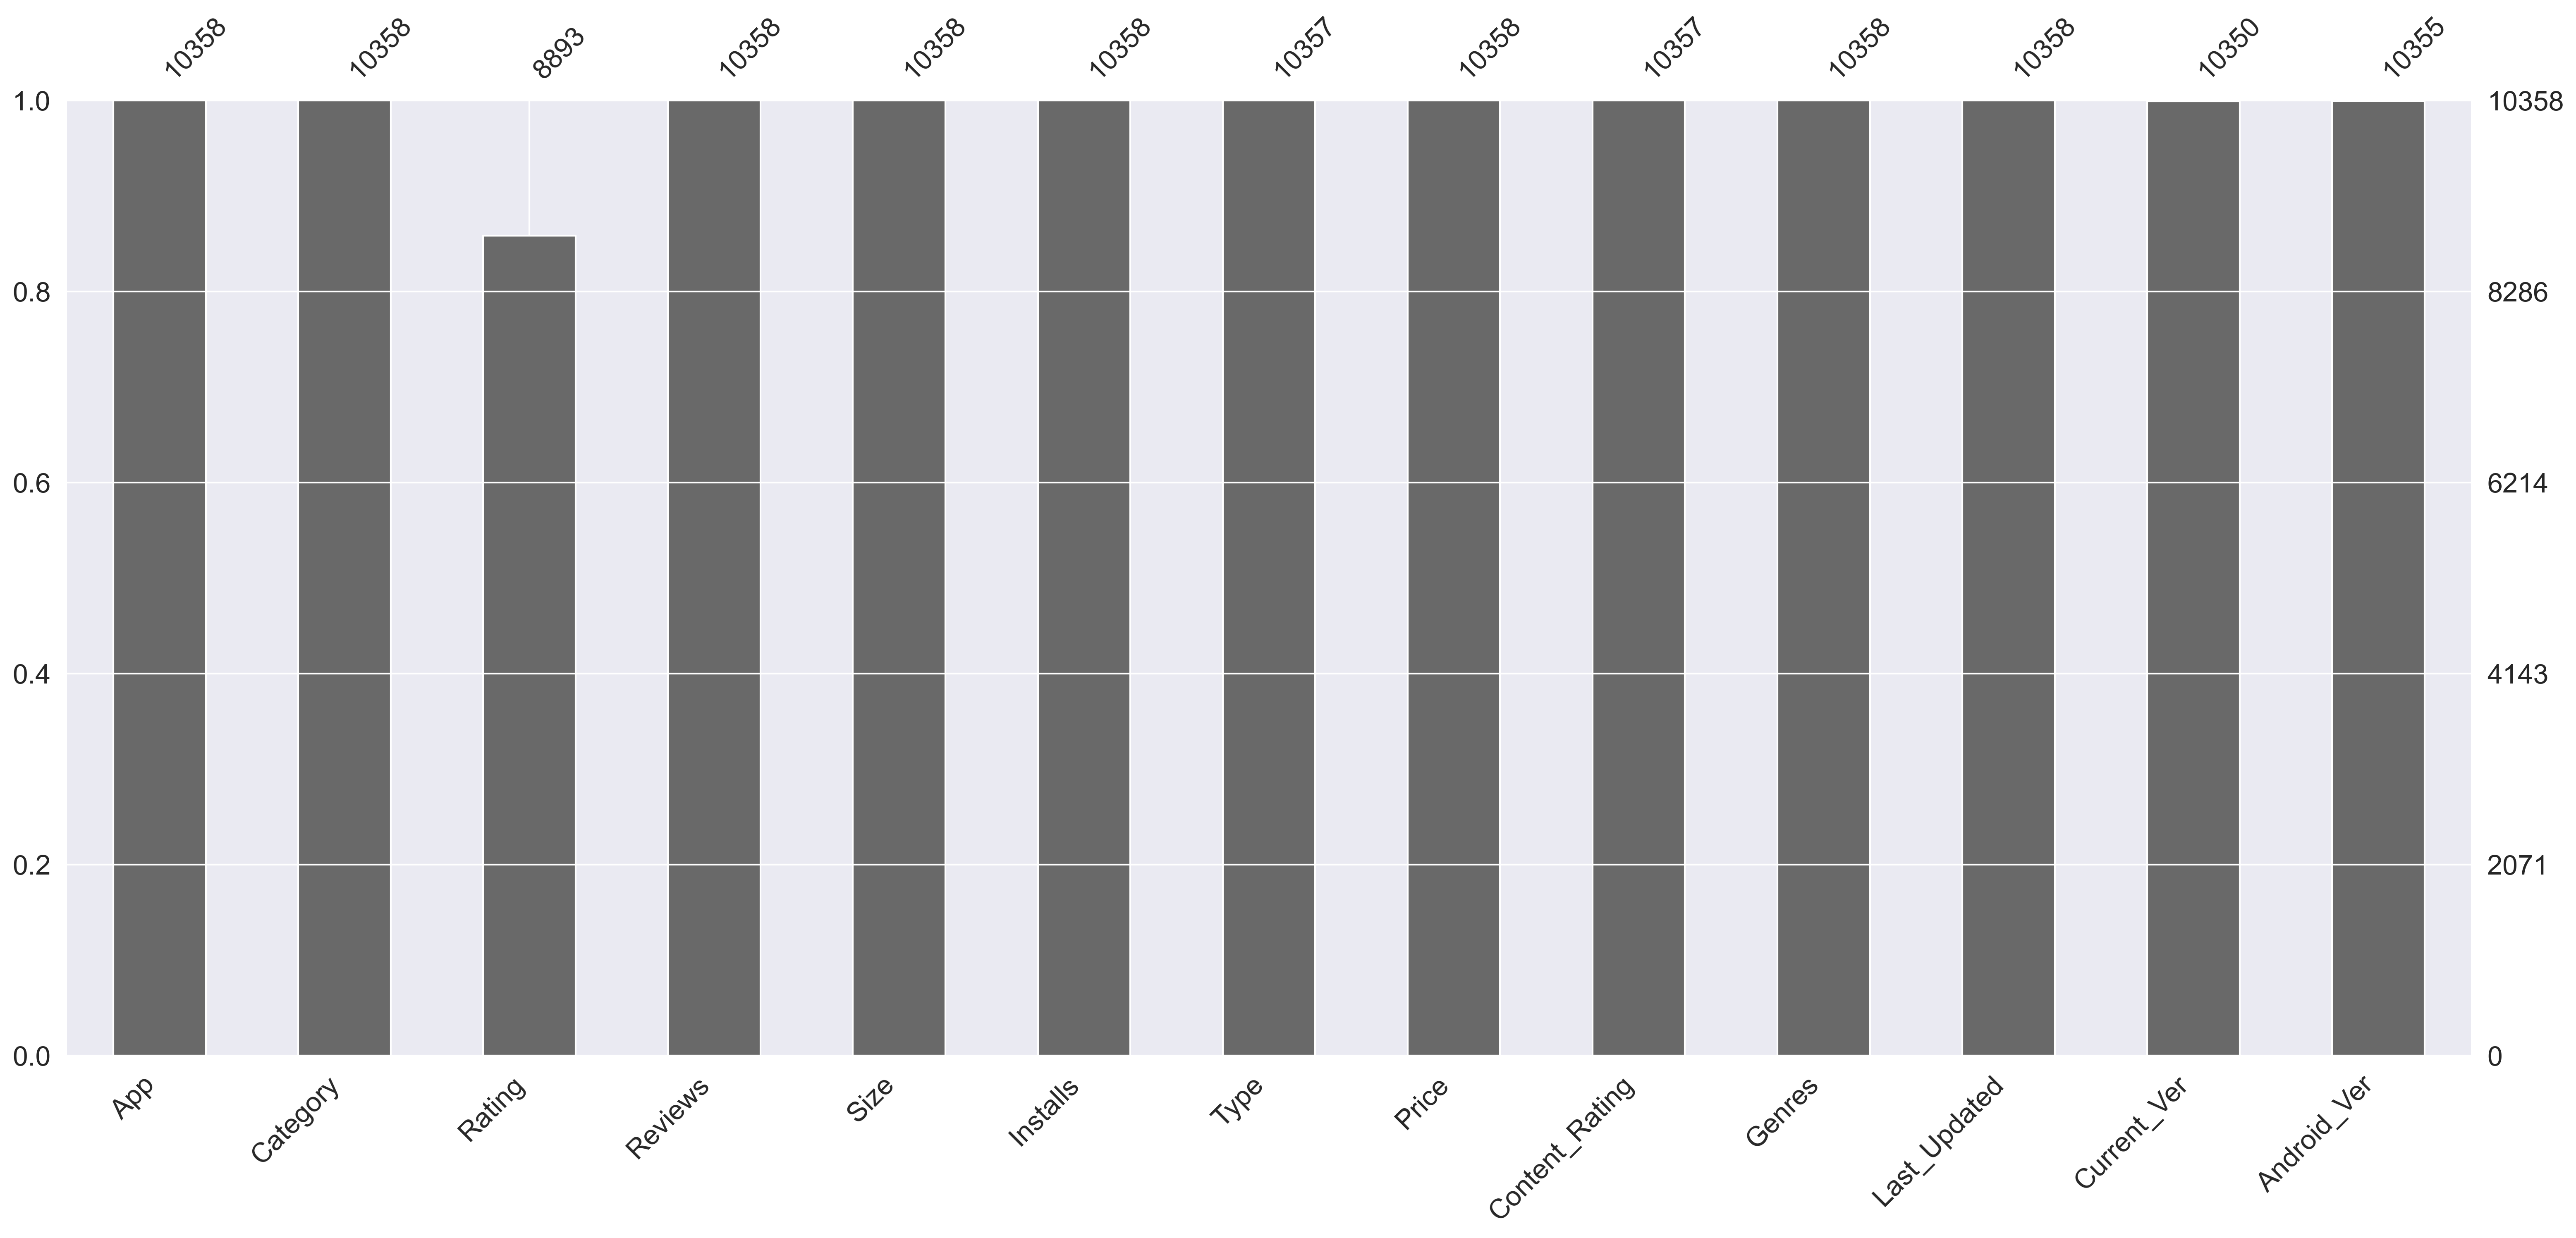

In [20]:
msno.bar(df);

The **msno.matrix(df);** code uses the missingno library to display missing values in the dataset as a matrix plot.

This visualization is very useful for understanding the structure of missing values in the dataset.

It helps you see which columns and rows have high concentrations of missing values and how these missing values are distributed across the dataset.

For example, if a particular column has a lot of missing values or if the missing values follow a specific pattern, you may need to do further work on that column or pattern.

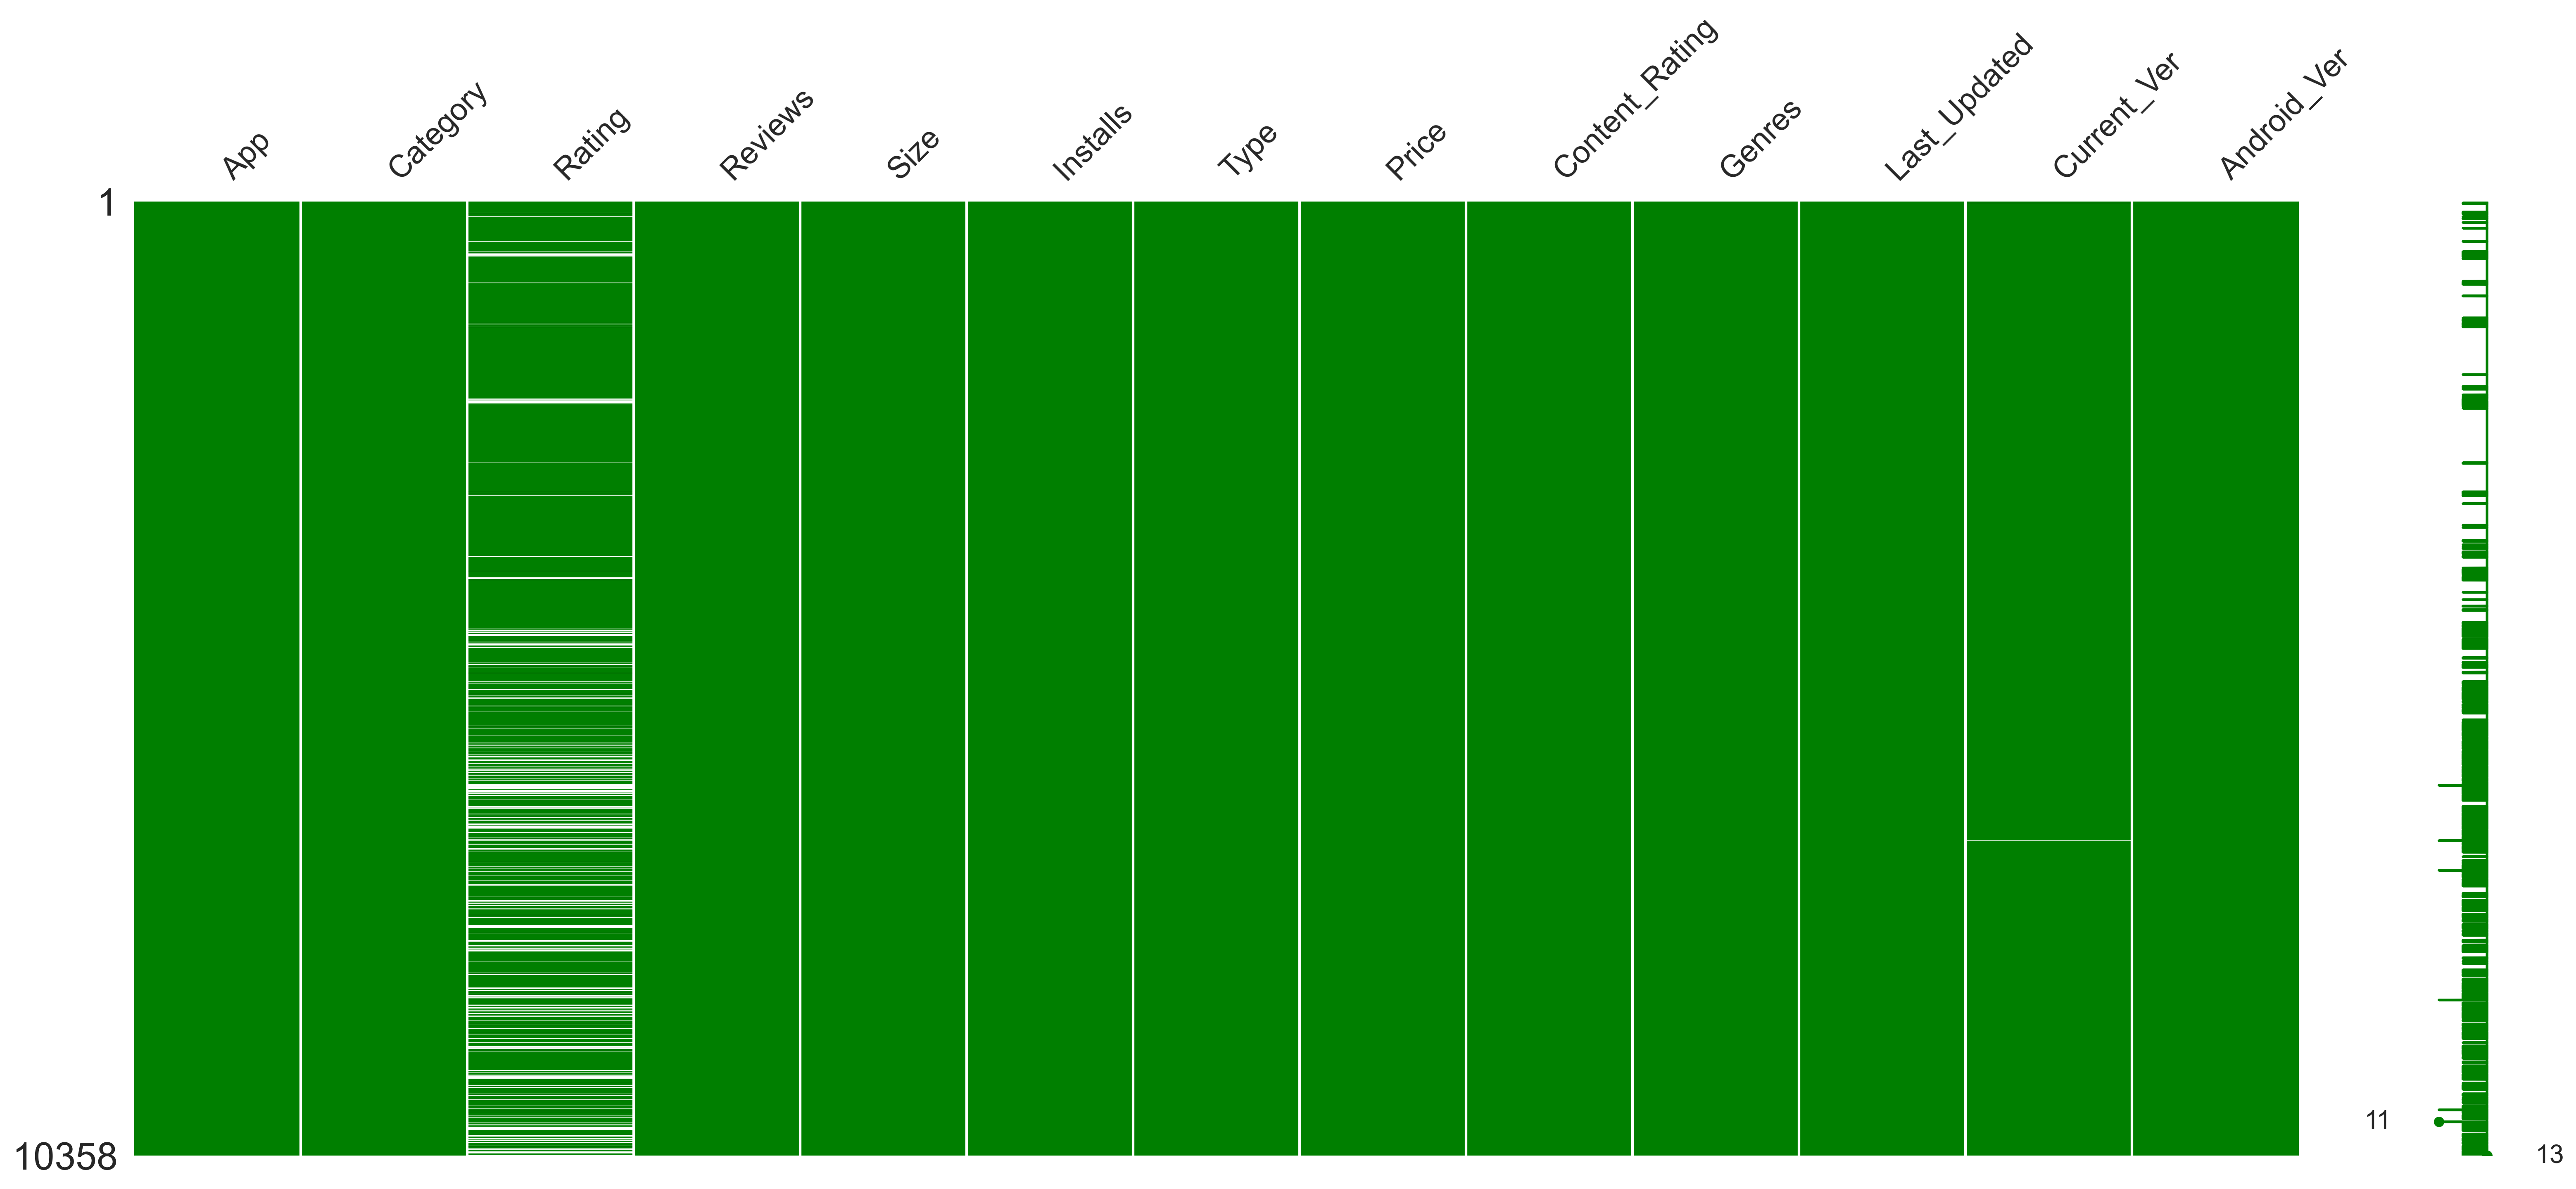

In [21]:
msno.matrix(df, color=(0, 0.5, 0), fontsize=18, sparkline=True);

In [22]:
df.isnull().sum() 

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

- From the visualizations above, we observed that there are many missing values in the Rating column.

- Missing values are often represented as "NaN" (Not a Number), and rows with these missing values can lead to undesirable results during analysis or model training.

- Therefore, removing rows with missing values can help in cleaning the dataset.

- There are many ways to handle missing values, and this is an important area in machine learning.

- For this column, I will use the option of filling missing values with the median, a commonly used method for handling missing data. The median value is the middle value of the dataset and is generally unaffected by outliers.

- When filling missing values, it is important to consider the presence of outliers in the data.

- In datasets with significant outliers, using the mean might be inappropriate. The mean can be easily influenced by outliers.

- Therefore, if your dataset has outliers and you do not want these values to affect the filling of missing values, using the median may be a better option.

- The median is typically a more robust choice for such situations because it is more "resilient" to outliers.

**rating_median = df["Rating"].median():** This line calculates the median value of the data in the "Rating" column and assigns this value to a variable named "rating_median". The median is the middle value when the dataset is ordered and represents more than half of the values in the dataset.

In [23]:
rating_median = df["Rating"].median()
rating_median

4.3

**df["Rating"].fillna(rating_median, inplace=True):** This line fills the missing values ("NaN") in the "Rating" column with the value of "rating_median". The `fillna` function is used to fill missing values in the specified column. The `inplace=True` parameter ensures that this change is applied directly to the DataFrame, making the modification in place rather than creating a new DataFrame.

In [24]:
df["Rating"].fillna(rating_median, inplace=True)

# df["Rating"].fillna(df["Rating"].median(), inplace=True)

Since there are fewer missing values in the other columns, I see no issue with dropping them.

**dropna():** Used to remove rows (observations) with missing values.

**inplace=True:** When set to "True," this parameter makes the changes permanent on the DataFrame.

In [25]:
df.dropna(inplace=True)

**sum():** This function sums up the number of "True" values, which means it calculates the count of missing values for each column.

**The second sum():** Sums up the counts of missing values for each column obtained from the first sum() operation. Thus, it provides the total number of missing values in the entire DataFrame.

In [26]:
df.isnull().sum().sum()

0

In [ ]:
df

## <font color='green'> <b>Reviews</b><font color='black'>

- **count:** There are 10,346 non-missing values.
- **unique:** Out of these 10,346 values, 5,999 are unique.
- **top:** The most frequent value is "0".
- **freq:** The value "0" occurs 591 times.

These statistics suggest that the "Reviews" column is being treated as **categorical** or **text** data. If this column represents numeric data (e.g., number of reviews), it might be beneficial to convert it to a numeric data type (such as int or float). This conversion would facilitate numerical analysis on this column later.

The high frequency of the "0" value could indicate that many applications have not received any reviews or that this data is missing. Such situations should be considered when analyzing the dataset or building models.

These statistics also provide a general idea of how the "Reviews" column is distributed within the dataset. For example, the most common value and its frequency give insights into how varied the dataset is or how prevalent a particular value is.

In [28]:
df["Reviews"].describe()

count     10346
unique     5999
top           0
freq        591
Name: Reviews, dtype: object

**df["Reviews"] = df["Reviews"].astype("int64")** changes the data type of the "Reviews" column in the pandas DataFrame to int64.

This conversion is used if the "Reviews" column contains numeric values but is not currently in a numeric data type (e.g., if it is stored as object or string).

The conversion allows for numerical analysis on the "Reviews" column and makes it possible to use this column in numerical models. For example, you can now calculate the mean, median, standard deviation, etc., for this column.

However, before running this code, you should ensure that the "Reviews" column does not contain any missing (NaN) or non-numeric values. If it does, the `astype("int64")` conversion will result in an error. You should handle missing or non-numeric values appropriately before performing this conversion.

In [29]:
df["Reviews"] = df["Reviews"].astype("int64")

- **count:** Number of non-missing values.
- **mean:** Average value.
- **std:** Standard deviation.
- **min:** Minimum value.
- **25%:** First quartile (Q1), the upper bound of the lower 25% of the dataset.
- **50%:** Median (Q2), the middle value of the dataset.
- **75%:** Third quartile (Q3), the lower bound of the upper 25% of the dataset.
- **max:** Maximum value.

In [114]:
df["Reviews"].describe().round()

count       10346.0
mean       406334.0
std       2698179.0
min             0.0
25%            32.0
50%          1688.0
75%         46598.0
max      78158306.0
Name: Reviews, dtype: float64

## <font color='green'> <b>Category</b><font color='black'>

In [31]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [32]:
df['Category'] = df['Category'].str.capitalize().str.replace("_", " ")

In [33]:
df['Category'].unique()

array(['Art and design', 'Auto and vehicles', 'Beauty',
       'Books and reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food and drink', 'Health and fitness', 'House and home',
       'Libraries and demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel and local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video players', 'News and magazines', 'Maps and navigation'],
      dtype=object)

## <font color='green'> <b>Size</b><font color='black'>   

**print(len(df["Size"].unique())):** Prints the number of unique values in the "Size" column.

**df["Size"].unique():** Returns the unique values present in the "Size" column.

These codes are useful for understanding how varied the "Size" column is. For example, if there are many unique values, you may need to perform some preprocessing steps when using this column in modeling (such as encoding it as a categorical variable or converting it to a numeric variable).

Additionally, seeing what these unique values are can provide insights into what steps might be needed for data cleaning or transformation. For example, if the "Size" column contains different units like "M" (Megabyte) and "K" (Kilobyte), you might need to convert these values to the same unit.

In [34]:
print(len(df["Size"].unique()))
df["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

The purpose of this function is to convert a given size value to megabytes (M).

1. **if isinstance(size, str):**: The function first checks if the `size` parameter is a string. If it is a string, it proceeds with conversion based on its content.

2. **if 'k' in size:**: If the `size` contains the character 'k', it indicates that the value is in kilobytes (K). To convert it to megabytes, the function divides the kilobyte value by 1024. The result is then rounded and displayed with two decimal places.

3. **elif 'M' in size:**: If the `size` contains the character 'M', it is already in megabytes. The function removes the 'M' character and returns the numeric value.

4. **else:**: If the `size` does not contain 'k' or 'M' (e.g., "Varies with device"), it returns None. This indicates that the value is unknown.

5. **return None:**: If the `size` parameter is not a string (e.g., None or NaN), the function returns None.

In [35]:
# df['Converted_Size'] = df['Size'].apply(
#     lambda x: None if x == 'Varies with device' else x[:-1]
#     if x[-1] == 'M' else round(float(x[:-1]) / 1024, 2))

In [36]:
# Function to convert 'Size' column
def convert_to_megabytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return round(float(size.replace('k', '')) / 1024, 2)
        elif 'M' in size:
            return float(size.replace('M', ''))
        else:
            return None  # For values like 'Varies with device' or other non-numeric values
    return None  # For None or NaN


In [37]:
# We transform the 'Size' column
df['Converted_Size'] = df['Size'].apply(convert_to_megabytes)

In [38]:
# Let's compare the converted 'Converted_Size' column with the original 'Size' column
sample_data = df[df['Size'].str.contains('k|M', na=False)]
sample_data[['Size', 'Converted_Size']].sample(20)

Size  Converted_Size
65     2.7M             2.7
5931    25M            25.0
1833    48M            48.0
1682    38M            38.0
1396   5.5M             5.5
7195    29M            29.0
6311   4.8M             4.8
5087   3.7M             3.7
9411    12M            12.0
8816    35M            35.0
10169  1.8M             1.8
83     5.4M             5.4
9324   4.4M             4.4
4293   8.9M             8.9
6632   1.2M             1.2
6200   2.2M             2.2
2069    91M            91.0
10228   10M            10.0
8893   7.8M             7.8
4550    64M            64.0

In [39]:
# df["Size"].replace("M","", regex=True, inplace = True)
# df["Size"].replace("k","", regex=True, inplace = True)

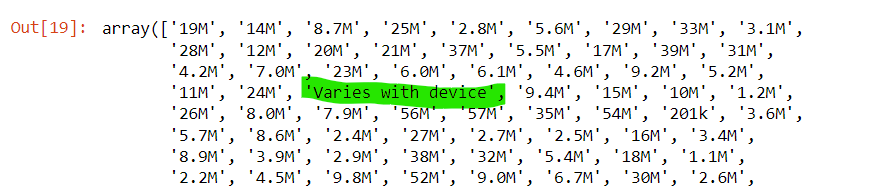

We will now replace the values marked as "Varies with device" in the "Size" column with the median of this column. To do this, we will first calculate the median of the "Size" column, and then use this median value to replace the "Varies with device" entries. By doing so, we are performing a feature engineering task to handle the ambiguous "Varies with device" values by substituting them with a meaningful median value.

The median is often less affected by outliers, making it a good option for filling in missing or ambiguous data.

To accomplish this, you will first calculate the median of the rows where "Size" is not "Varies with device," and then replace the "Varies with device" entries with this median value.

**df[df["Size"] != "Varies with device"]:** Selects the rows from the DataFrame (`df`) where the "Size" column is not "Varies with device."

**["Size"].astype(float):** Converts the "Size" column of the selected rows to float type. This is necessary for calculating the median since the median is a numerical measure.

**.median():** Calculates the median of the "Size" column.

As a result, the `size_median` variable stores this median value. This value can be used to fill in the "Varies with device" or missing entries in the "Size" column.

The median is often a good option for filling in missing data because it is less affected by outliers in the dataset.

In [40]:
size_median = df[df["Converted_Size"]!="Varies with device"]["Converted_Size"].astype(float).median()
size_median

13.0

**Code Explanation**

This code snippet replaces the values marked as "Varies with device" in the "Size" column with the previously calculated `size_median` value.

**df["Size"].replace("Varies with device", size_median, inplace=True):** Replaces all occurrences of "Varies with device" in the "Size" column with `size_median`. The `inplace=True` parameter ensures that the changes are made directly to the same DataFrame.

This operation fills the ambiguous values in the "Size" column with a numerical value, making the column usable for subsequent numerical analyses or machine learning models. Such modifications are typically considered feature engineering, as they aim to transform the data to make the feature (column) more useful for the model.

In [41]:
df["Converted_Size"].replace("Varies with device", size_median, inplace=True)

**pd.to_numeric(df.Converted_Size):** The `to_numeric` function from Pandas converts the values in the "Converted_Size" column to a numeric format. If there is an error during conversion (e.g., if a value is not numeric), it will raise an error message.

This process ensures that the "Converted_Size" column is ready for numerical analyses or machine learning models.

In [42]:
df.Converted_Size = pd.to_numeric(df.Converted_Size)

In [43]:
df.Converted_Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Converted_Size, dtype: float64

**df.Size.describe().round()**: This code calculates the basic statistics for the "Size" column and rounds these values to the nearest integer.

In [44]:
df.Converted_Size.describe().round(1)

count    8821.0
mean       21.3
std        22.5
min         0.0
25%         4.7
50%        13.0
75%        29.0
max       100.0
Name: Converted_Size, dtype: float64

In [45]:
df.drop("Size", axis=1, inplace=True)

In [46]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Converted_Size'],
      dtype='object')

## <font color='green'> <b>Installs</b> <font color='black'>   

In [47]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

**df.Installs = df.Installs.apply(lambda x: x.replace("+", "")):** This code removes the "+" character from each value in the "Installs" column. For example, "10,000+" becomes "10,000".

**df.Installs = df.Installs.apply(lambda x: x.replace(",", "")):** This code removes the comma (",") character from each value in the "Installs" column. For example, "10,000" becomes "10000".

**df.Installs = df.Installs.apply(lambda x: int(x)):** This code converts each value in the "Installs" column to an integer. For example, "10000" becomes 10000 (as an integer, not a string).

These operations prepare the "Installs" column for numerical analysis or machine learning models by converting it into a suitable numerical format. Such transformations are typically considered feature engineering because they aim to modify the data to make it more effective for model use.

In [48]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

# df.Installs = df.Installs.apply(lambda x: int(x.replace("+", "").replace(",", "")))

In [49]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

These unique values indicate the number of times applications have been downloaded. For example:

- **10,000:** Indicates that the application has been downloaded 10,000 times.
- **500,000:** Indicates that the application has been downloaded 500,000 times.
- **1,000,000:** Indicates that the application has been downloaded 1,000,000 times.

Storing these values as integers makes the column more useful for numerical analysis and machine learning models.

For example, you can use these numerical values as dependent or independent variables in a regression model.

## <font color='green'><b>Price</b> <font color='black'>   

This information can be crucial in determining how to preprocess or transform the "Price" column. For instance, if this column contains numerical values but they are stored in a string format (e.g., "$1.99"), you may need to convert these values into a numerical format.

Such an analysis helps gain a general understanding of the dataset and, specifically, to understand the distribution of this column before moving on to the modeling phase.

In [50]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**df.Price = df.Price.apply(lambda x:x.replace("$","")):** This line removes the leading \$ sign from the values ​​in the "Price" column. The apply method allows you to apply a specific operation to each column value. In this case, the \$ sign in each value is replaced with an empty string using the lambda function.

**df.Price = df.Price.apply(lambda x:float(x)):** This line converts the values ​​in the "Price" column to a decimal (float) number. The apply method is used to apply a transformation to each column value. In this case, each value is converted to a decimal number with the float() function.

As a result, this snippet clears the values ​​in the "Price" column and converts them to the decimal number data type. This is very useful when you need to use the prices in the column as numerical data.

In [51]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

# df.Price = df.Price.apply(lambda x: float(x.replace("$", "")))

In [52]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## <font color='green'> <b>Genres</b><font color='black'>  

In [53]:
df["Genres"].nunique()

119

In [54]:
df["Genres"].head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

The output displays the first 10 rows of the "Genres" column. As observed, this column typically contains one or more genres or categories separated by a semicolon **(";")**.

**For example:**

- **"Art & Design"**: Indicates that the application belongs to the "Art & Design" category.
- **"Art & Design;Pretend Play"**: Indicates that the application belongs to both the "Art & Design" and "Pretend Play" categories.
- **"Art & Design;Creativity"**: Indicates that the application belongs to both the "Art & Design" and "Creativity" categories.

Such a column is typically considered a categorical attribute and often requires preprocessing for machine learning models. For instance, if you want to include this column in your model, you might use a method like "One-Hot Encoding" to convert this categorical variable into a numerical format.

This output also gives insight into the types of applications covered by the dataset. For example, the initial 10 rows only contain applications from the "Art & Design" category. However, this does not imply that the entire dataset is restricted to this category; it only applies to the first 10 rows.

Since there are 119 unique genres in this column, I will reduce this number by focusing only on the primary genres. Therefore, I will write a code to extract and retain only the primary genre, excluding sub-genres.

**Code Explanation**

This code snippet splits the values in the "Genres" column by a semicolon (";") and then takes the first element (index 0). For example, if a row contains multiple genres or categories (e.g., "Art & Design;Pretend Play"), this code will only take the first genre or category ("Art & Design").

**df["Genres"].str.split(";"):** This part splits each value in the "Genres" column by a semicolon (";"). As a result, a list is returned for each row.

**.str[0]:** This part takes the first element of the created list (Python indexes start at 0).

This operation aims to simplify the "Genres" column. For instance, if an app belongs to multiple genres, this code only keeps the first genre. This can make the dataset more manageable for machine learning models, but it's important to note that this approach may lose some information if an app has multiple genres or categories.

In [55]:
df["Genres"] = df["Genres"].str.split(";").str[0]

**Code Explanation**

**len(df["Genres"].unique())** counts the number of distinct unique values in the "Genres" column.

This code gives an idea of how diverse the "Genres" column is. For example, if this number is very high, it indicates that the column contains many different categories or genres. If the number is low, it typically means the column shows less diversity.

Such an analysis is useful for gaining a general understanding of the dataset and understanding the distribution of this column before moving on to the modeling phase.

In [56]:
df["Genres"].nunique()

48

In [57]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [58]:
df["Genres"].value_counts()

Genres
Tools                      841
Entertainment              627
Education                  609
Business                   427
Medical                    408
Productivity               407
Personalization            386
Lifestyle                  374
Action                     371
Sports                     368
Communication              367
Finance                    360
Photography                322
Health & Fitness           308
Social                     280
News & Magazines           264
Casual                     263
Travel & Local             237
Arcade                     234
Books & Reference          232
Shopping                   224
Simulation                 216
Dating                     196
Video Players & Editors    178
Puzzle                     161
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     119
Strategy                   108
Educational                106
Adventure                   91
A

This output suggests that "Music" and "Music & Audio" are used interchangeably, so it would be correct to standardize all of them to "Music."

In [59]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

## <font color='Green'> <b>Last_Updated</b><font color='black'> 

The "Last_Updated" column contains dates indicating when the application was last updated. This column is typically in date format (e.g., "January 7, 2018").

The output of this code shows the general structure of this column and how the dates are stored. If you plan to use this column in your model, preprocessing steps such as converting dates to a numerical format or calculating the number of days between dates may be necessary.

Such analysis is useful for gaining an overall understanding of the dataset and, specifically, for understanding how this column is distributed before moving on to the modeling phase.

In [60]:
df["Last_Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

**pd.to_datetime(df["Last_Updated"]):** The `to_datetime` function from the Pandas library can convert a series, list, or a single date value into a datetime object. This code snippet converts all values in the "Last_Updated" column into datetime objects.

This conversion is useful for working with dates more easily. For example, you can now calculate the number of days since the last update, or group the data by specific time periods such as years, months, or days using this column.

In [61]:
# Create datetime array

df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [62]:
# Split Year, Month and Day into separate columns

df['Year'] = df['Last_Updated'].dt.year
df['Month'] = df['Last_Updated'].dt.month
df['Day'] = df['Last_Updated'].dt.day

In [63]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  Art and design     4.1   
1                                Coloring book moana  Art and design     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  Art and design     4.7   
3                              Sketch - Draw & Paint  Art and design     4.5   
4              Pixel Draw - Number Art Coloring Book  Art and design     4.3   

   Reviews  Installs  Type  Price Content_Rating        Genres Last_Updated  \
0      159     10000  Free    0.0       Everyone  Art & Design   2018-01-07   
1      967    500000  Free    0.0       Everyone  Art & Design   2018-01-15   
2    87510   5000000  Free    0.0       Everyone  Art & Design   2018-08-01   
3   215644  50000000  Free    0.0           Teen  Art & Design   2018-06-08   
4      967    100000  Free    0.0       Everyone  Art & Design   2018-06-20   

          Current_Ver   Android_Ver  Converted_Size  Year  Month  Day  
0               1.0.0  4.0.3 and up            19.0  2018      1    7  
1               2.0.0  4.0.3 and up            14.0  2018      1   15  
2               1.2.4  4.0.3 and up             8.7  2018      8    1  
3  Varies with device    4.2 and up            25.0  2018      6    8  
4                 1.1    4.4 and up             2.8  2018      6   20

In [64]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
Converted_Size           float64
Year                       int32
Month                      int32
Day                        int32
dtype: object

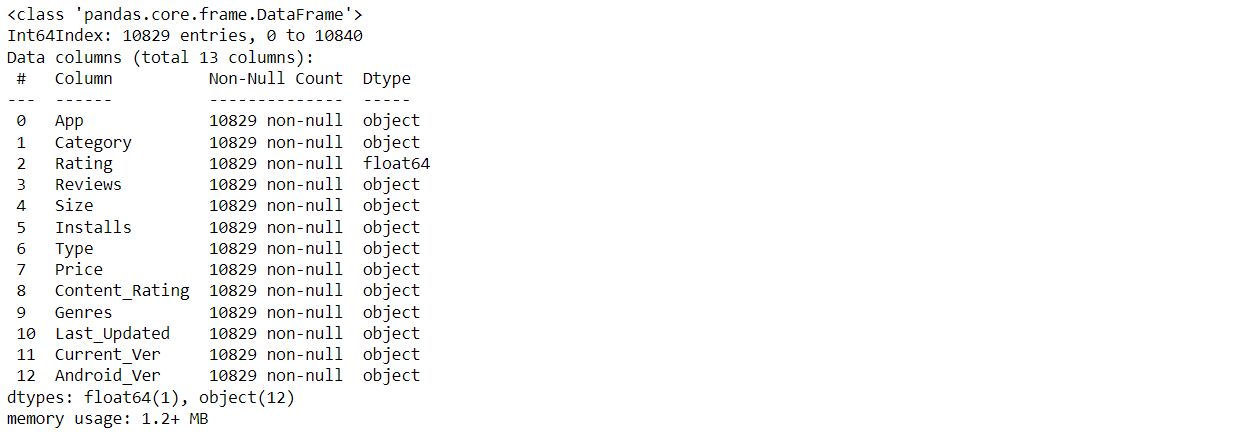

<a id='research-queries'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Research Queries and Analytical Insights</b></p>
![](https://neilpatel.com/wp-content/uploads/2021/03/Data-Visualization_Featured-Image-1.png)

## <font color='green'><b> What are the top categories in terms of the number of apps?</b><font color='black'> 

We are creating a bar chart that shows the frequency of values in the "Type" column.

**type_counts = df['Type'].value_counts():** This line calculates the number of occurrences of each unique value in the "Type" column and stores this information in the `type_counts` variable.

**plt.figure(figsize=(15, 10)):** This line sets the size of the figure to 15x10 inches.

**plt.bar(type_counts.index, type_counts.values, color=['blue', 'orange']):** This line plots the bar chart. `type_counts.index` provides the values for the x-axis ("Free" and "Paid"), and `type_counts.values` provides the values for the y-axis (the number of apps for each type).

**plt.xlabel('App Type'), plt.ylabel('Number of Apps'), plt.title('Number of Apps by App Type'):** These lines add labels to the x and y axes and provide a title for the chart.

**plt.show():** This line displays the chart.

In [65]:
# Get count of values ​​in column 'Type'

type_counts = df['Type'].value_counts()
type_counts

Type
Free    9584
Paid     762
Name: count, dtype: int64

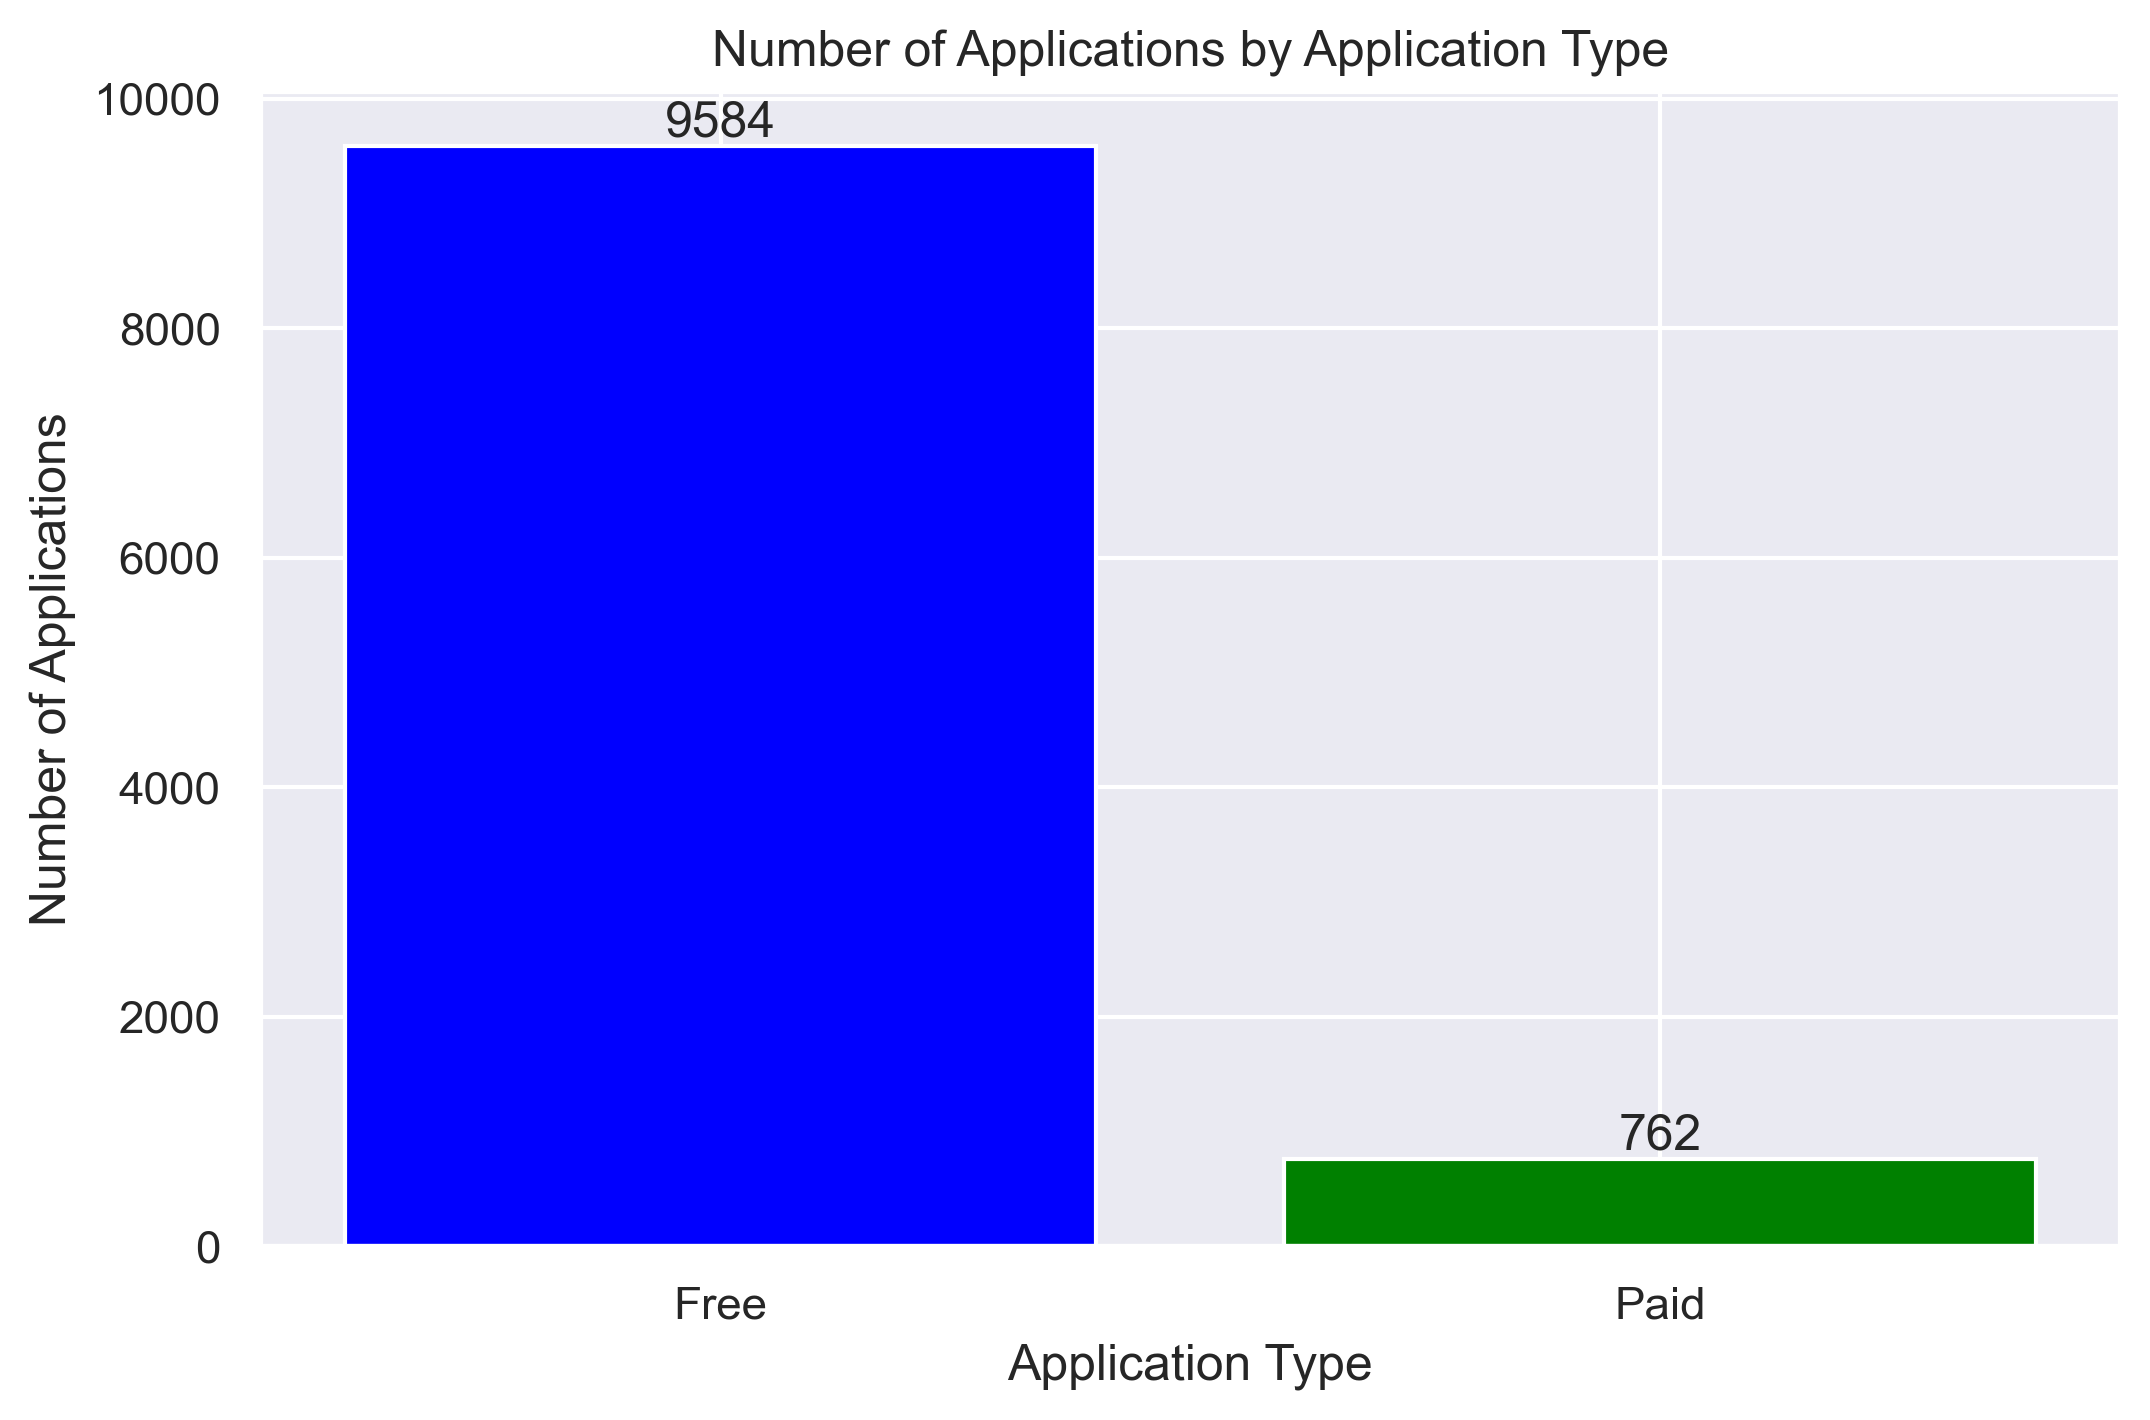

In [66]:
plt.figure(figsize=(8, 5))  =
bars = plt.bar(type_counts.index, type_counts.values, color=['blue', 'green'])  # "bars" değişkenine atama yap

# Axis labels and title
plt.xlabel('Application Type')
plt.ylabel('Number of Applications')
plt.title('Number of Applications by Application Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
plt.show()

## <font color='green'> <b>What is the distribution of ratings by application type?</b><font color='black'> 

We are plotting a box plot of the "Rating" values for each unique value in the "Type" column ("Free" and "Paid").

**plt.figure(figsize=(15, 10)):** This line sets the size of the figure to 15x10 inches.

**sns.boxplot(...):** This line uses the seaborn library to draw the box plot. The `palette` parameter is used to set the colors: blue for "Free" and green for "Paid".

**plt.xlabel('App Type'), plt.ylabel('Rating'), plt.title('Rating Distribution by App Type'):** These lines add labels to the x and y axes and provide a title for the chart.

**plt.show():** This line displays the chart.

In [67]:
average_ratings = df.groupby('Type')['Rating'].mean()
average_ratings

Type
Free    4.198560
Paid    4.269291
Name: Rating, dtype: float64

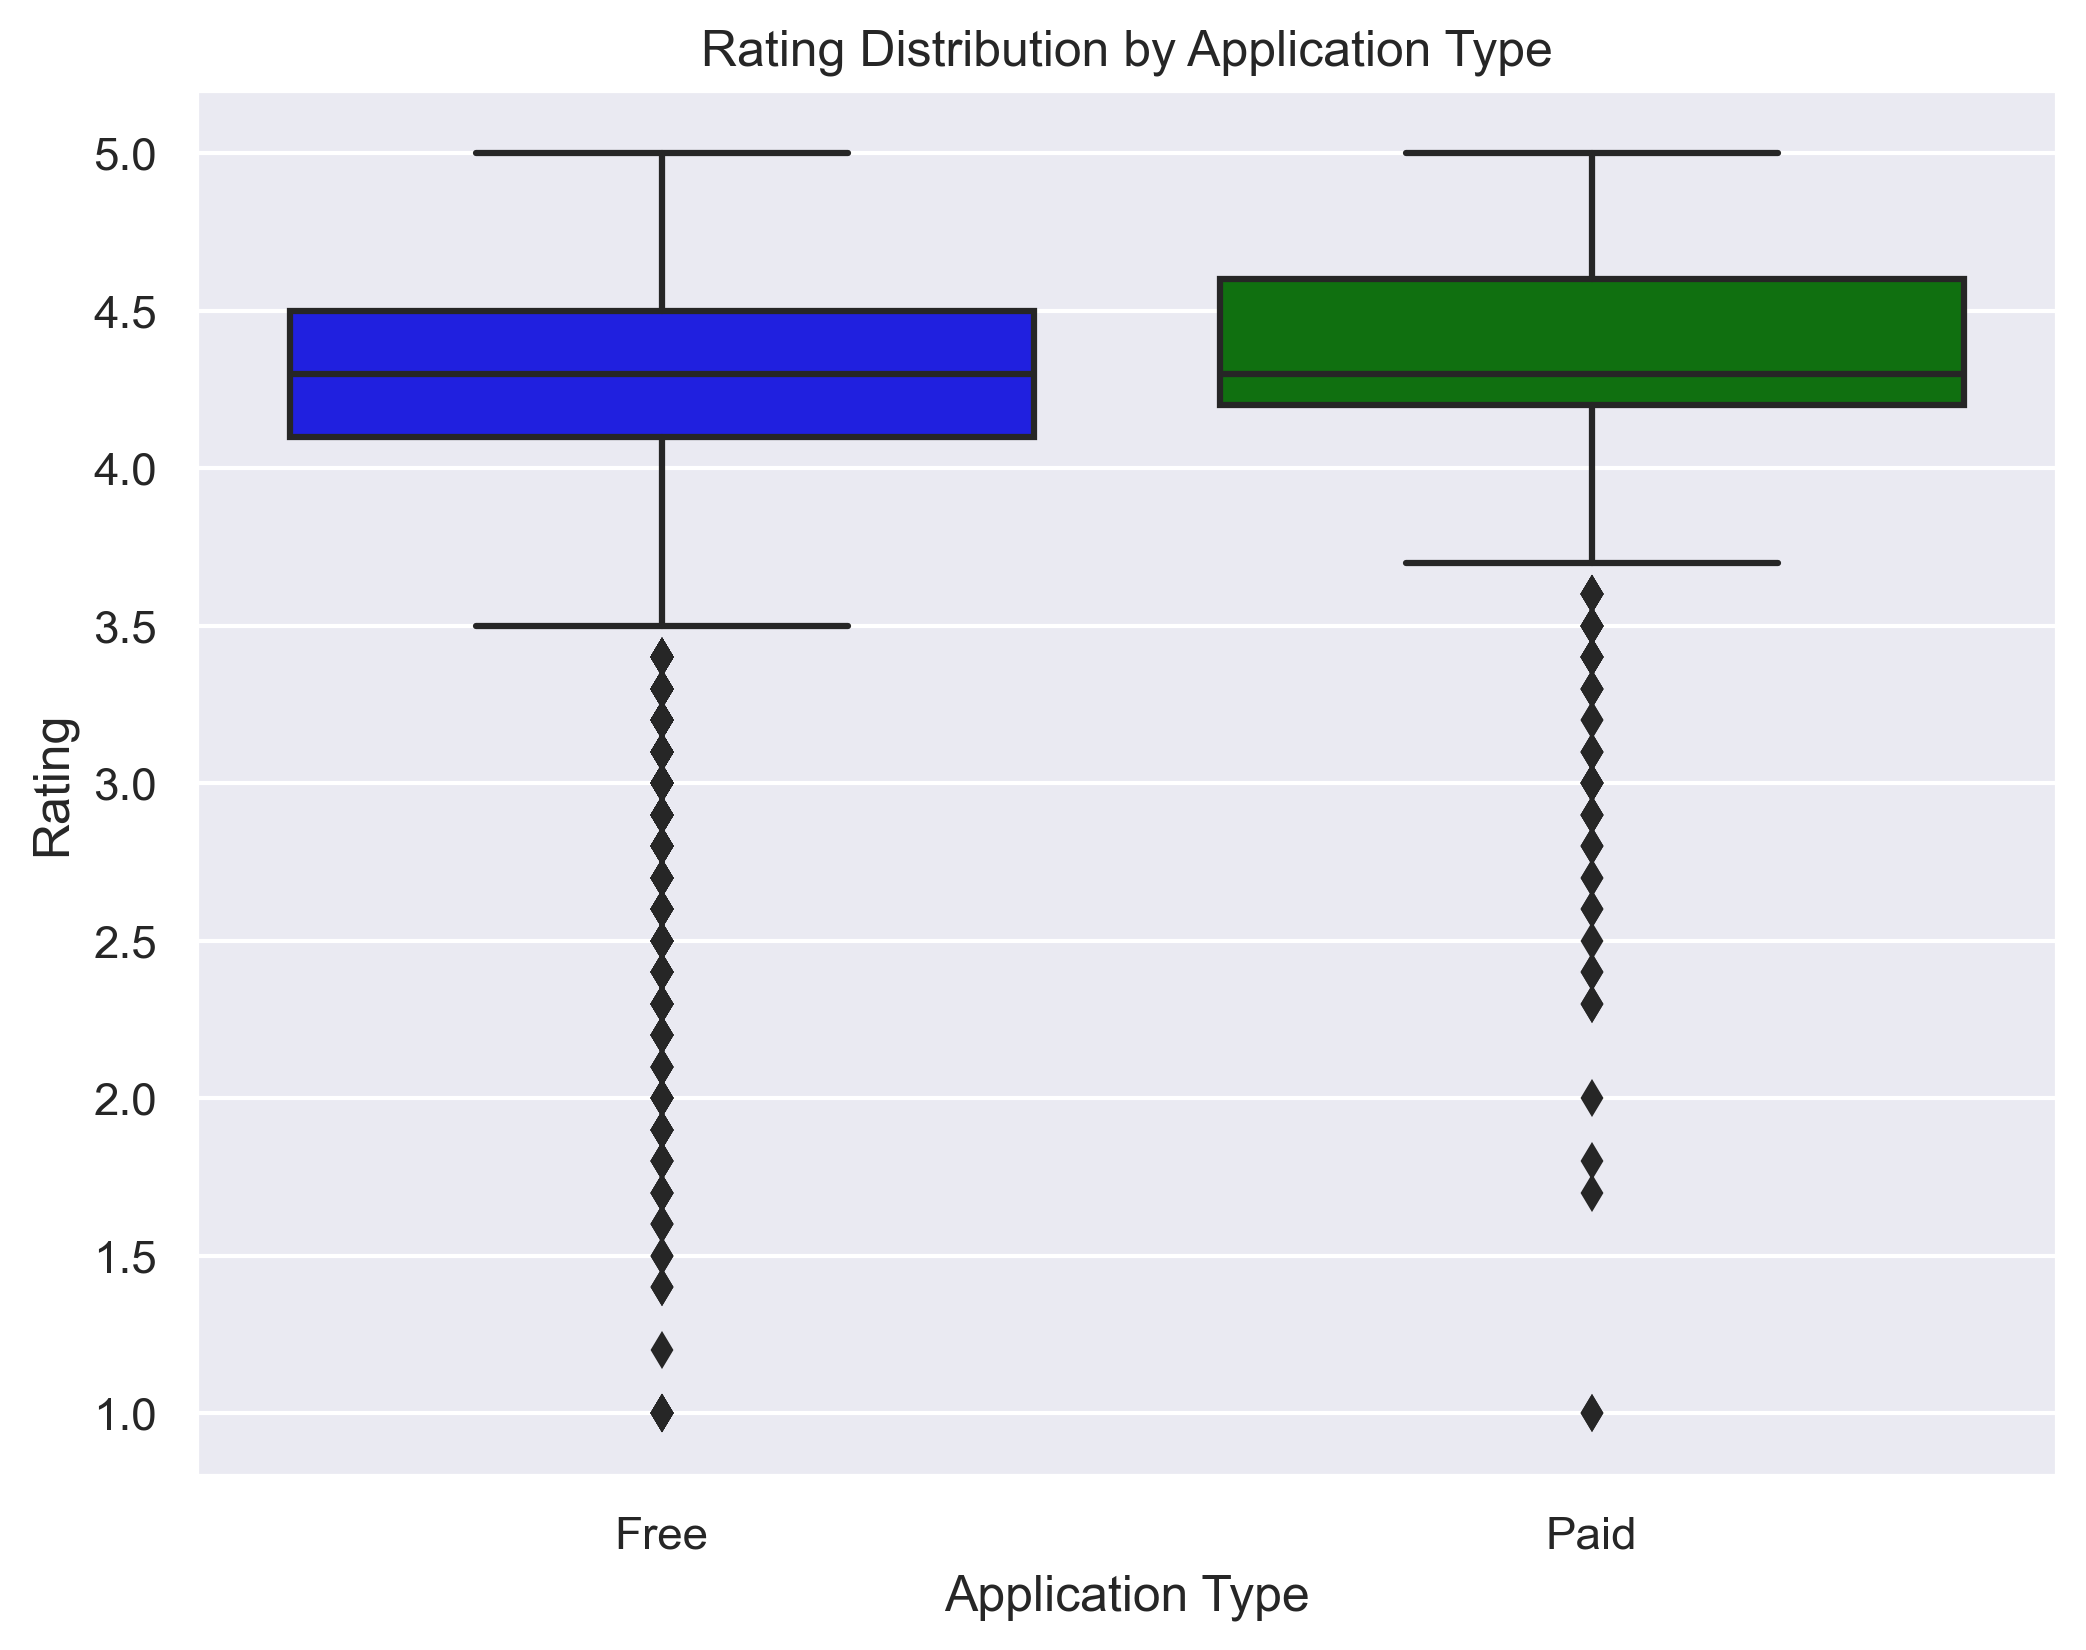

In [68]:

plt.figure(figsize=(8, 6))

sns.boxplot(x='Type', y='Rating', data=df, palette={"Free": "blue", "Paid": "green"}) 

plt.xlabel('Application Type')
plt.ylabel('Rating')
plt.title('Rating Distribution by Application Type')

plt.show()

**Lower horizontal line (whisker) = Minimum:** Represents the lowest value in the dataset. However, this line does not include outliers.

**Upper horizontal line (whisker) = Maximum:** Represents the highest value in the dataset. This line also excludes outliers.

**Bottom edge of the box = First Quartile (Q1):** Represents the first 25% of the dataset.

**Top edge of the box = Third Quartile (Q3):** Represents the first 75% of the dataset.

**Horizontal line inside the box = Median (Q2):** Represents the median (middle value) of the dataset.

- **IQR (Interquartile Range):** The difference between the first and third quartiles, which is the height of the box. IQR indicates the spread of the data distribution.

- **Outliers:** Points outside the upper and lower horizontal lines represent outliers.

- **Box:** Represents the area between the first quartile (Q1) and the third quartile (Q3) and shows the central distribution of the dataset.

This plot allows you to compare the rating distributions of free and paid apps. For example, you can investigate whether free apps generally have higher ratings or if paid apps receive higher scores. Additionally, the presence of outliers can be observed.

**NOTE**

If you wonder why values outside the whiskers are not considered as minimum or maximum, the following note will provide the answer:

- In a box plot, the "minimum" and "maximum" values shown are actually the "whiskers," which ignore outliers. These whiskers represent the range of values that encompass most of the dataset, excluding outliers.

- These whiskers are typically calculated using the IQR (Interquartile Range), which is the range between Q3 and Q1. For example, the lower whisker is often calculated as "Q1 - 1.5 * IQR" and the upper whisker as "Q3 + 1.5 * IQR." These formulas are designed to reflect the general structure of the data distribution and aim to exclude outliers.

- Therefore, the "minimum" and "maximum" values shown in a box plot are not the absolute lowest and highest values of the entire dataset. Instead, they represent a range that covers most of the data while excluding outliers.

- A box plot is designed to show the "typical" range of a dataset, but it also considers outliers. In other words, a box plot provides both the central tendency (median, quartiles) and the spread of the data distribution (IQR, outliers).

## <font color='green'><b> What are the categories of ratings and their counts?</b><font color='black'> 

We are showing how frequently different "Rating" categories occur in the dataset.

**plt.figure(figsize=(15, 10)):** This line sets the size of the plot to be created. The width is set to 15 units, and the height is set to 10 units.

**sns.countplot(x="Rating", data=df):** This line uses the Seaborn library's `countplot` function to draw a vertical bar plot showing the count of values in the "Rating" column. The `x` parameter specifies which column to use, and the `data` parameter specifies the DataFrame.

**plt.title:** This line sets the title of the plot.

**plt.xlabel and plt.ylabel:** These lines set the labels for the X and Y axes.

**plt.show():** This line displays the plot on the screen.

- Which rating category has the most or least observations?

- What is the distribution of ratings? (For example, are most apps rated high or low?)

- Is there a noticeable imbalance among rating categories?

In [69]:
rating_counts = df['Rating'].value_counts().sort_index()
rating_counts

Rating
1.0      16
1.2       1
1.4       3
1.5       3
1.6       4
1.7       8
1.8       8
1.9      12
2.0      12
2.1       8
2.2      14
2.3      20
2.4      19
2.5      20
2.6      24
2.7      23
2.8      40
2.9      45
3.0      82
3.1      69
3.2      63
3.3     101
3.4     127
3.5     157
3.6     169
3.7     231
3.8     293
3.9     372
4.0     538
4.1     656
4.2     887
4.3    2476
4.4    1031
4.5     976
4.6     768
4.7     484
4.8     228
4.9      87
5.0     271
Name: count, dtype: int64

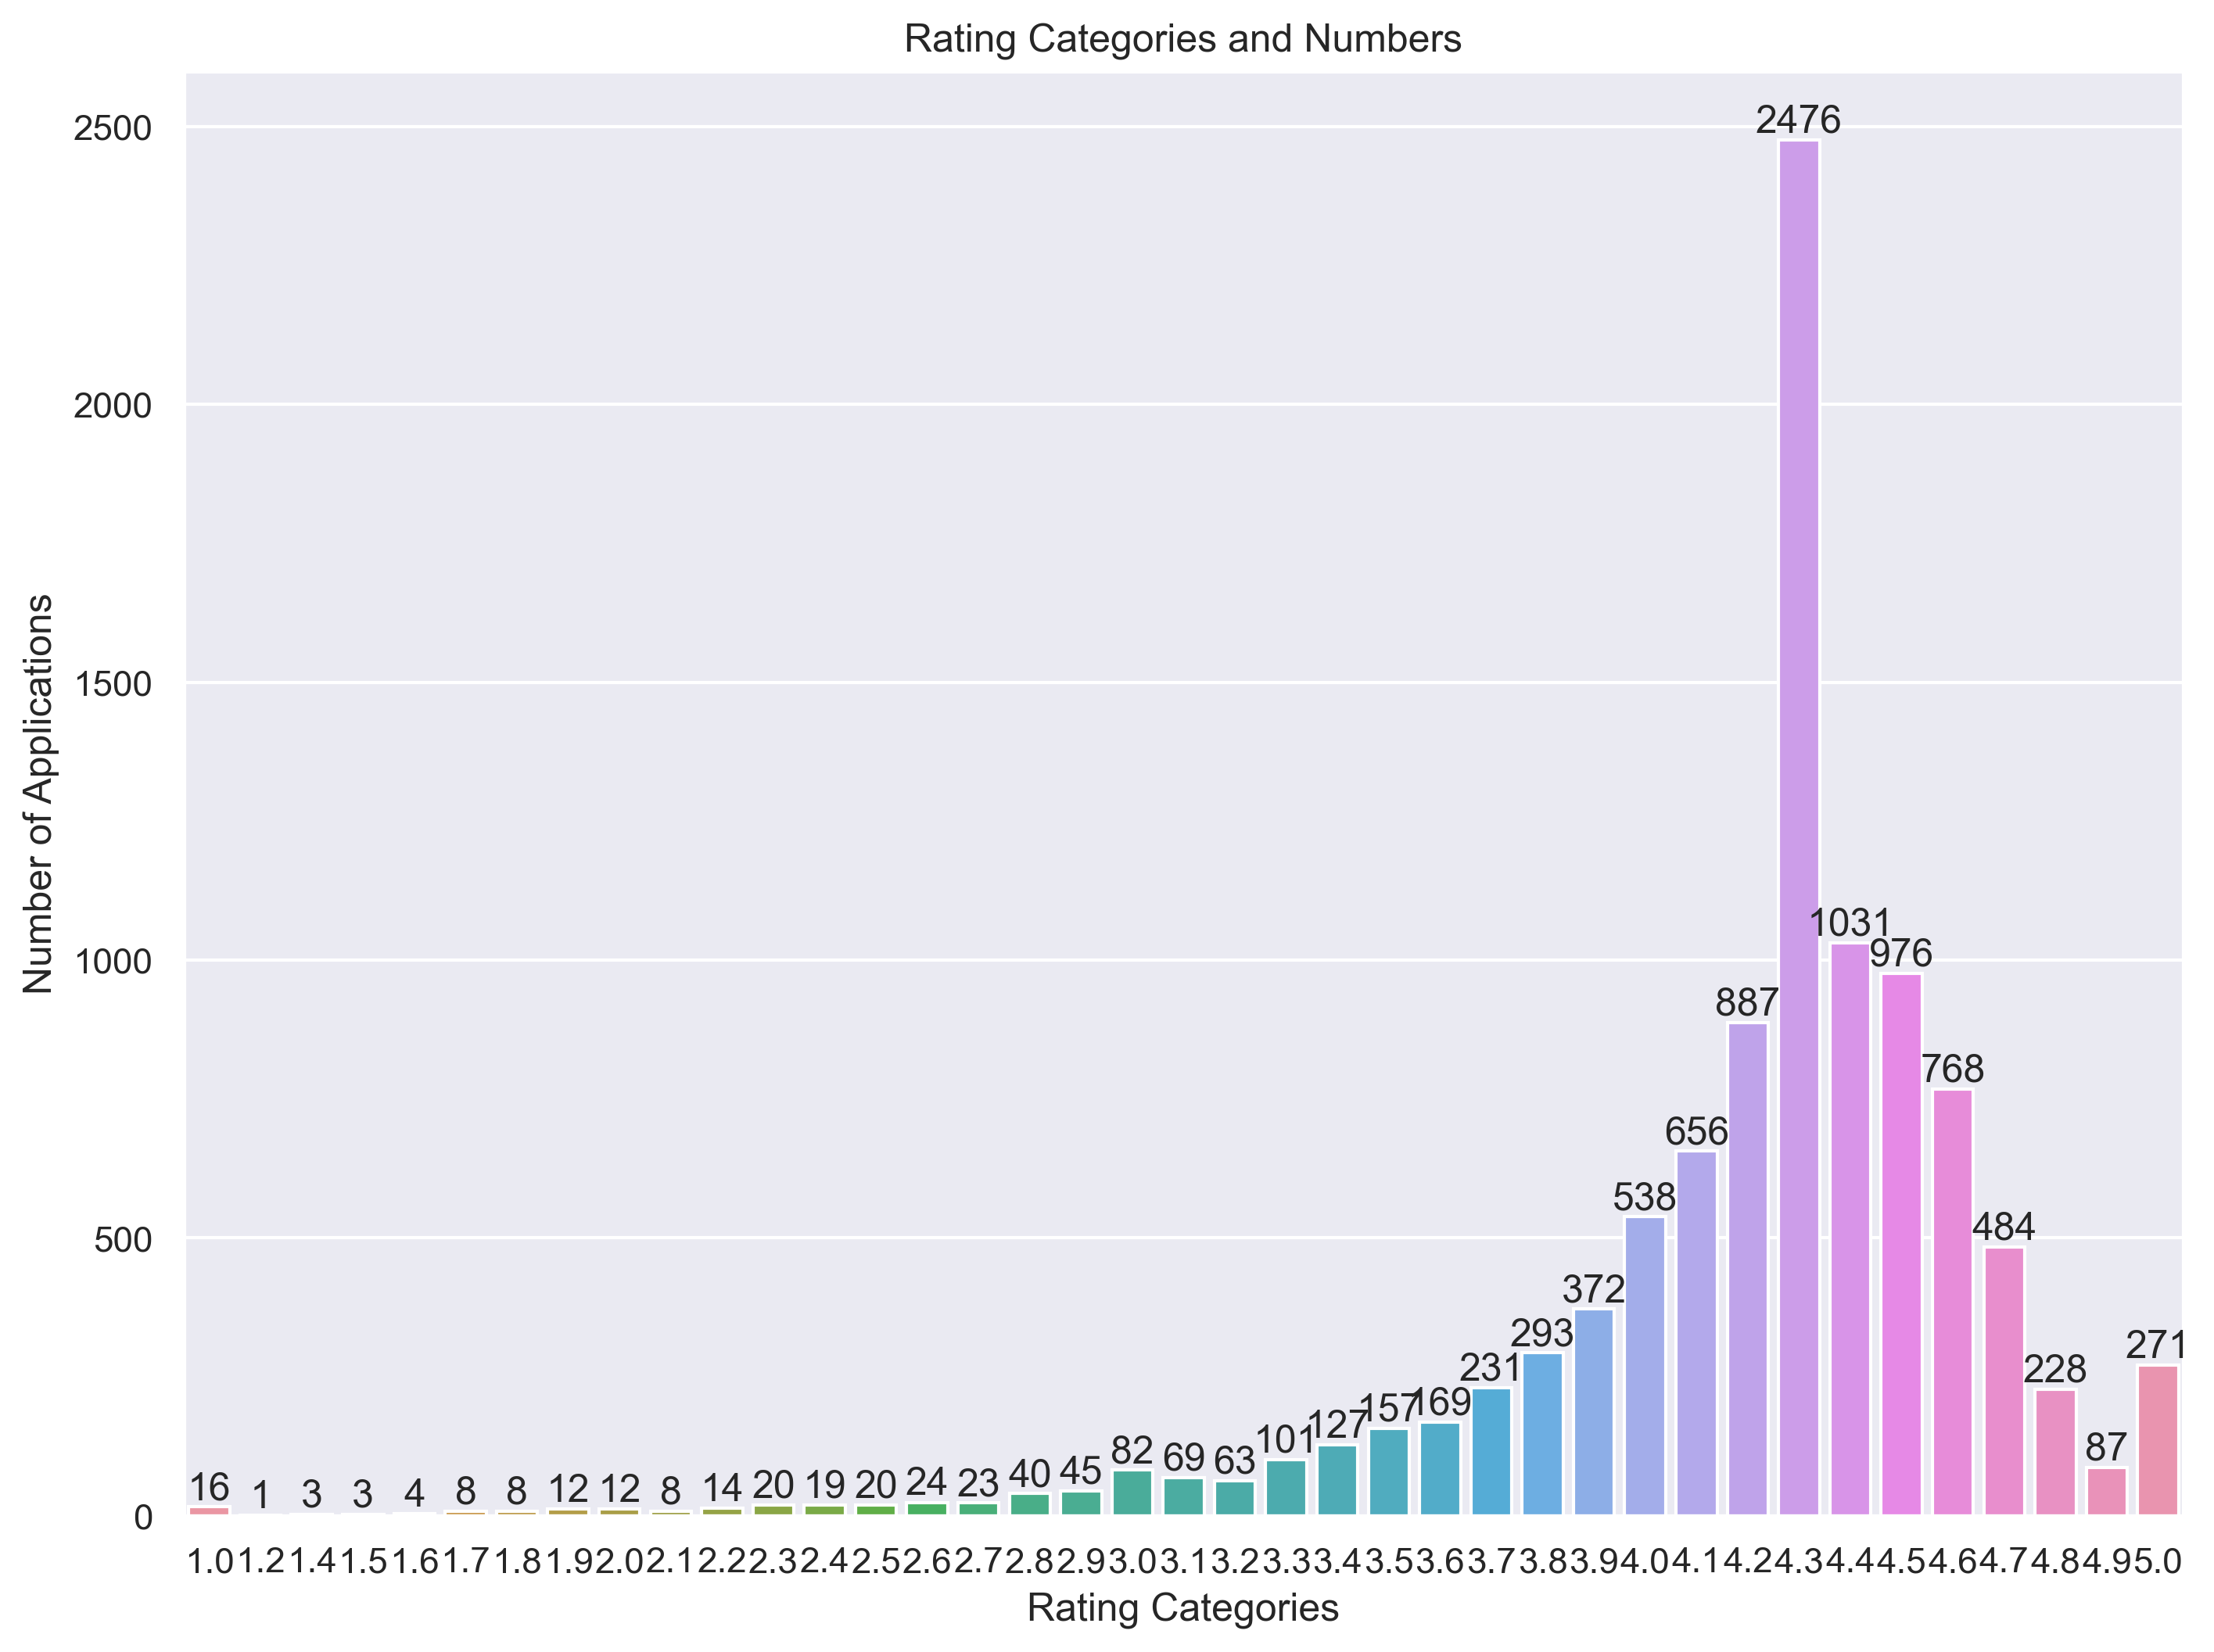

In [70]:

plt.figure(figsize=(11,8))

ax = sns.countplot(x="Rating", data=df) 

for container in ax.containers:
    ax.bar_label(container)

plt.title("Rating Categories and Numbers")

plt.xlabel("Rating Categories")
plt.ylabel("Number of Applications")

plt.show()

We are showing the distribution of apps according to their "Content Rating" categories.

**plt.figure(figsize=(15, 10)):** This line sets the size of the plot.

**sns.countplot(y="Content_Rating", data=df, order=df['Content_Rating'].value_counts().index):** This line draws a horizontal bar plot showing the count of values in the "Content_Rating" column. The `y` parameter specifies which column to use, and the `order` parameter arranges the bars from highest to lowest count.

**plt.title("İçerik Derecelendirmeleri ve Sayıları"):** This line sets the title of the plot.

**plt.xlabel("Uygulama Sayısı") and plt.ylabel("Content Rating"):** These lines set the labels for the X and Y axes.

**plt.show():** This line displays the plot on the screen.

- Which content rating is the most common or least common?

- What is the distribution of content ratings?

- How many apps are available for specific age groups or target audiences?

In [71]:
content_rating_counts = df['Content_Rating'].value_counts()
content_rating_counts

Content_Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

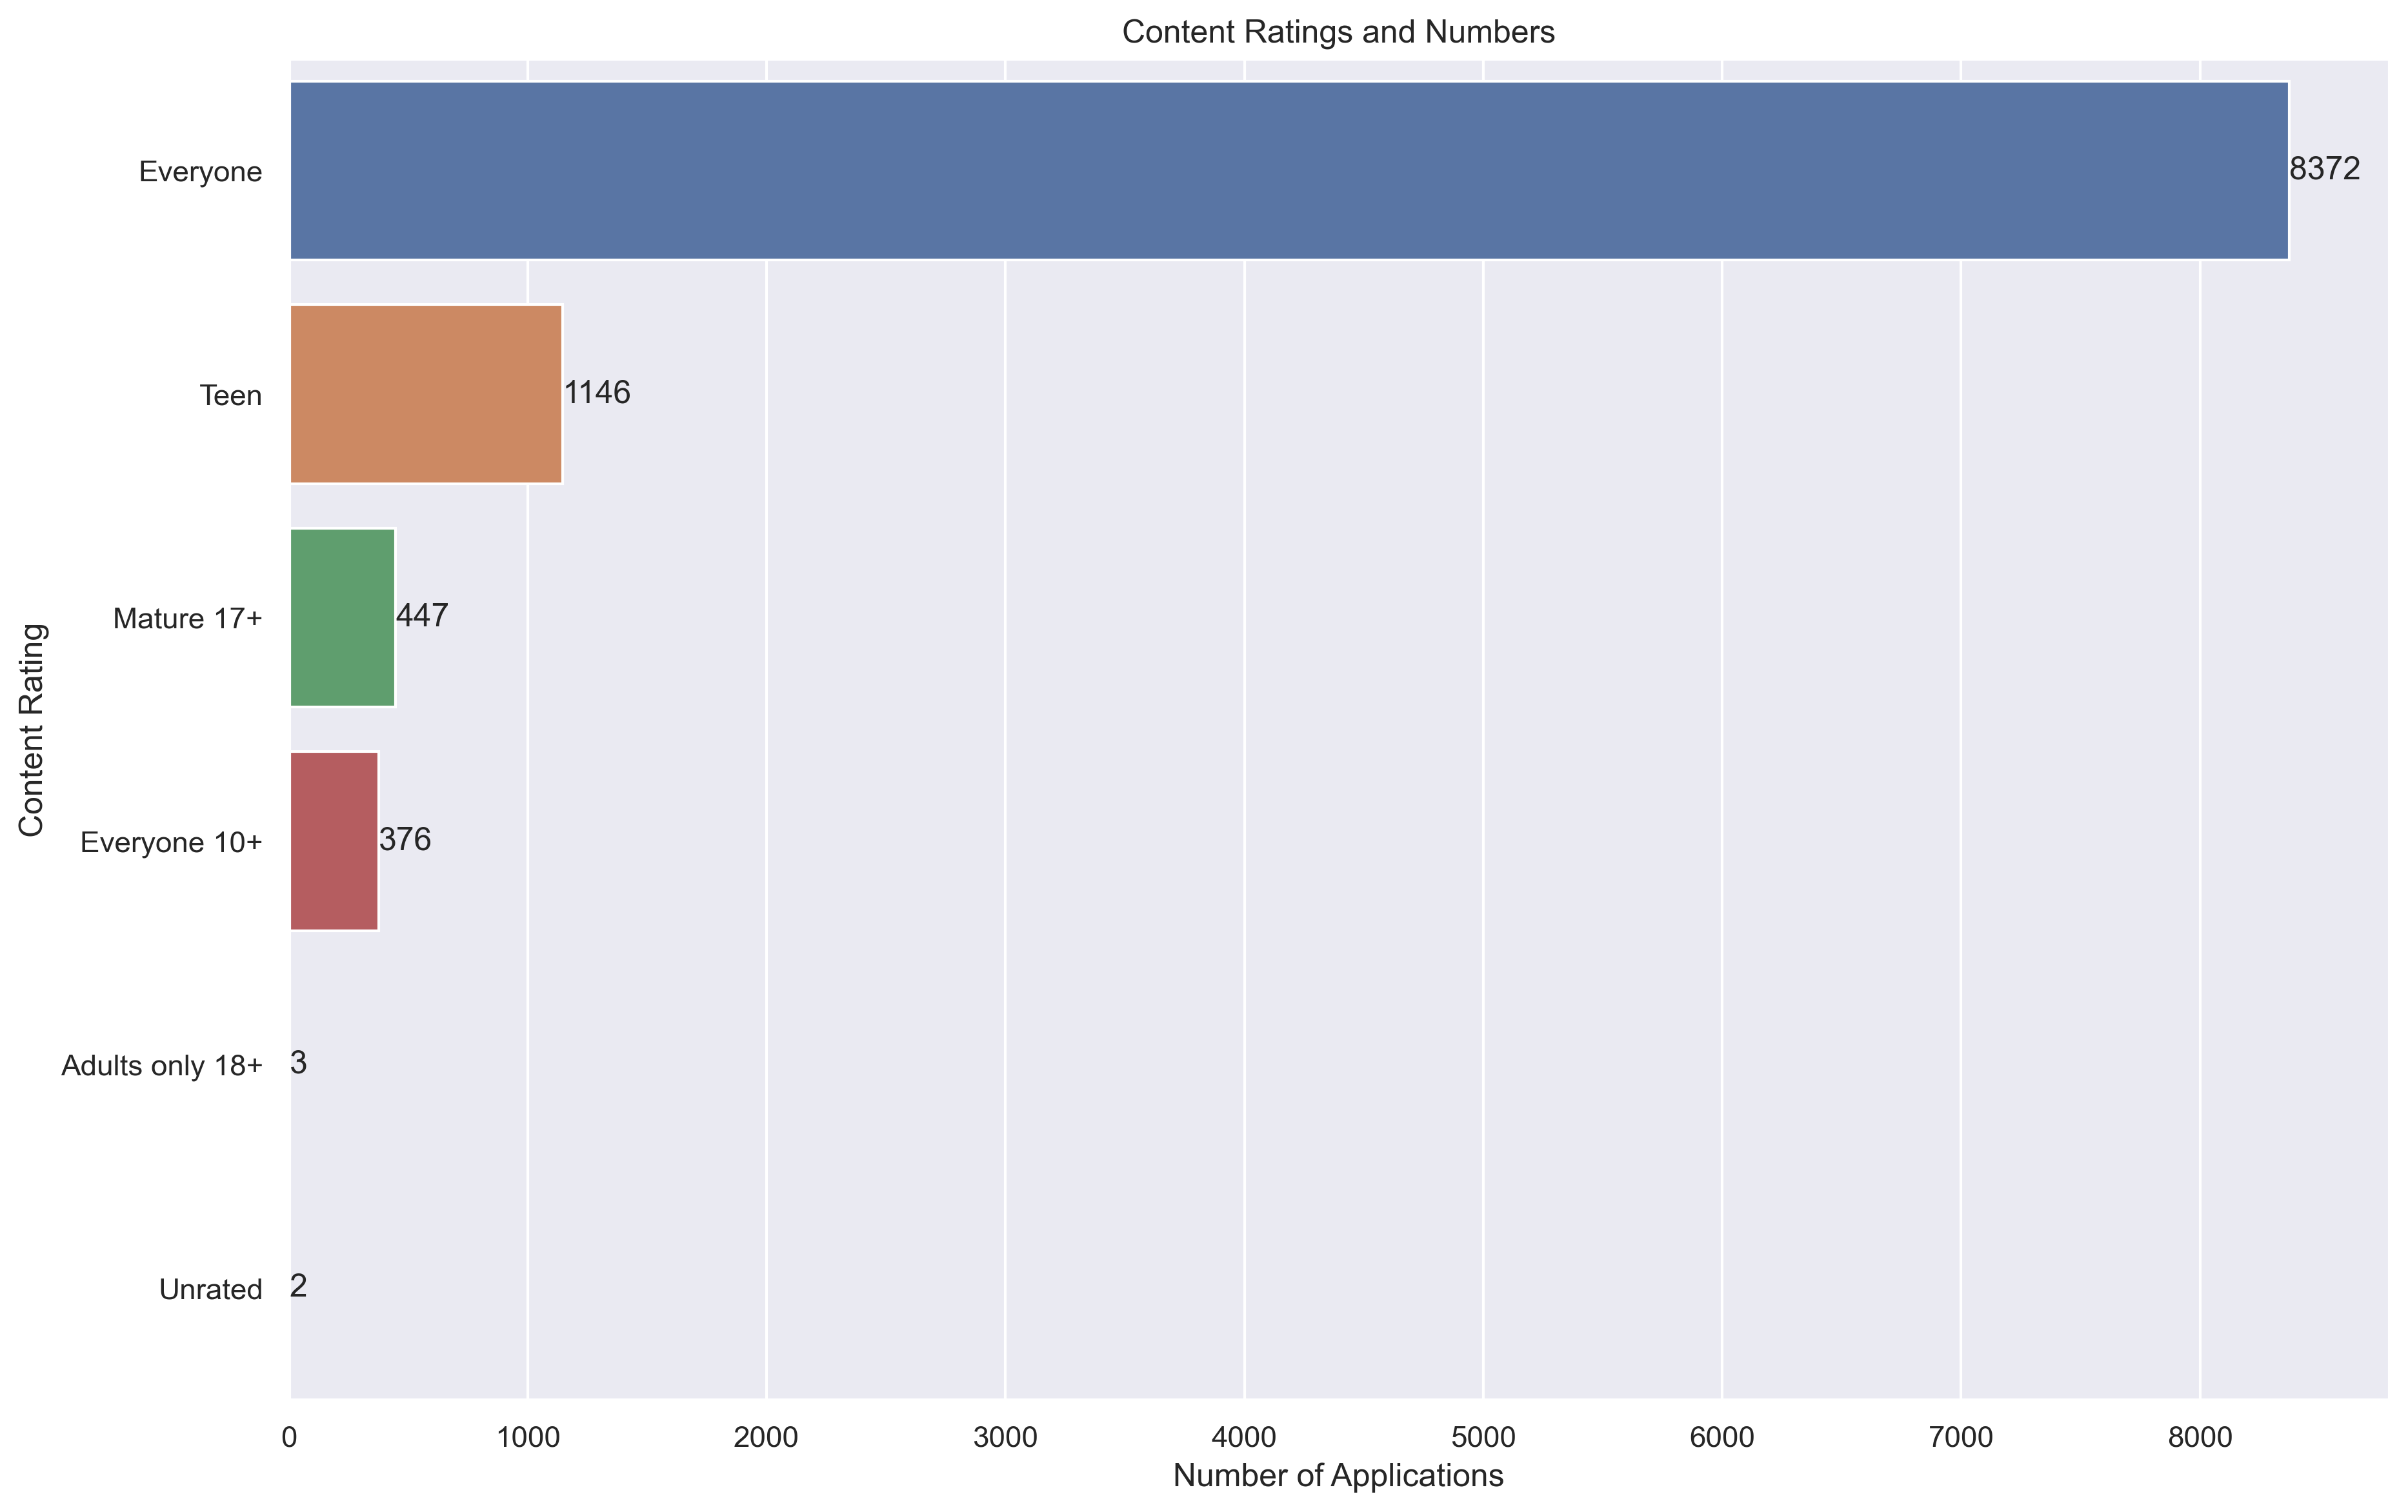

In [72]:

plt.figure(figsize=(14, 9))

ax = sns.countplot(y="Content_Rating", data=df, order = df['Content_Rating'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Content Ratings and Numbers")

plt.xlabel("Number of Applications")
plt.ylabel("Content Rating")

plt.show()

## <font color='green'> <b>How Does Content Rating Affect User Ratings in Apps?</b><font color='black'>

We are displaying the distribution of user ratings ("Rating") for Android apps with different "Content Rating" categories.

**plt.figure(figsize=(15, 10)):** This line sets the size of the plot. Width is set to 15 units and height to 10 units. (This line is missing in the code, if you wish to add it.)

**sns.boxplot(x="Content_Rating", y="Rating", data=df):** This line uses the Seaborn library's `boxplot` function to draw a box plot showing the distribution of the "Rating" column across different "Content_Rating" categories. The `x` and `y` parameters specify which columns to use, and the `data` parameter specifies the data frame.

**plt.title("The content rating & rating", size=20):** This line sets the title of the plot and the title size.

- How is the rating distribution for each content rating category?

- Which content rating category has the highest or lowest average rating?

- Are there significant differences in rating distribution between content rating categories?

In [73]:
average_ratings_by_content = df.groupby('Content_Rating')['Rating'].mean()
average_ratings_by_content

Content_Rating
Adults only 18+    4.300000
Everyone           4.199164
Everyone 10+       4.256117
Mature 17+         4.138479
Teen               4.245462
Unrated            4.200000
Name: Rating, dtype: float64

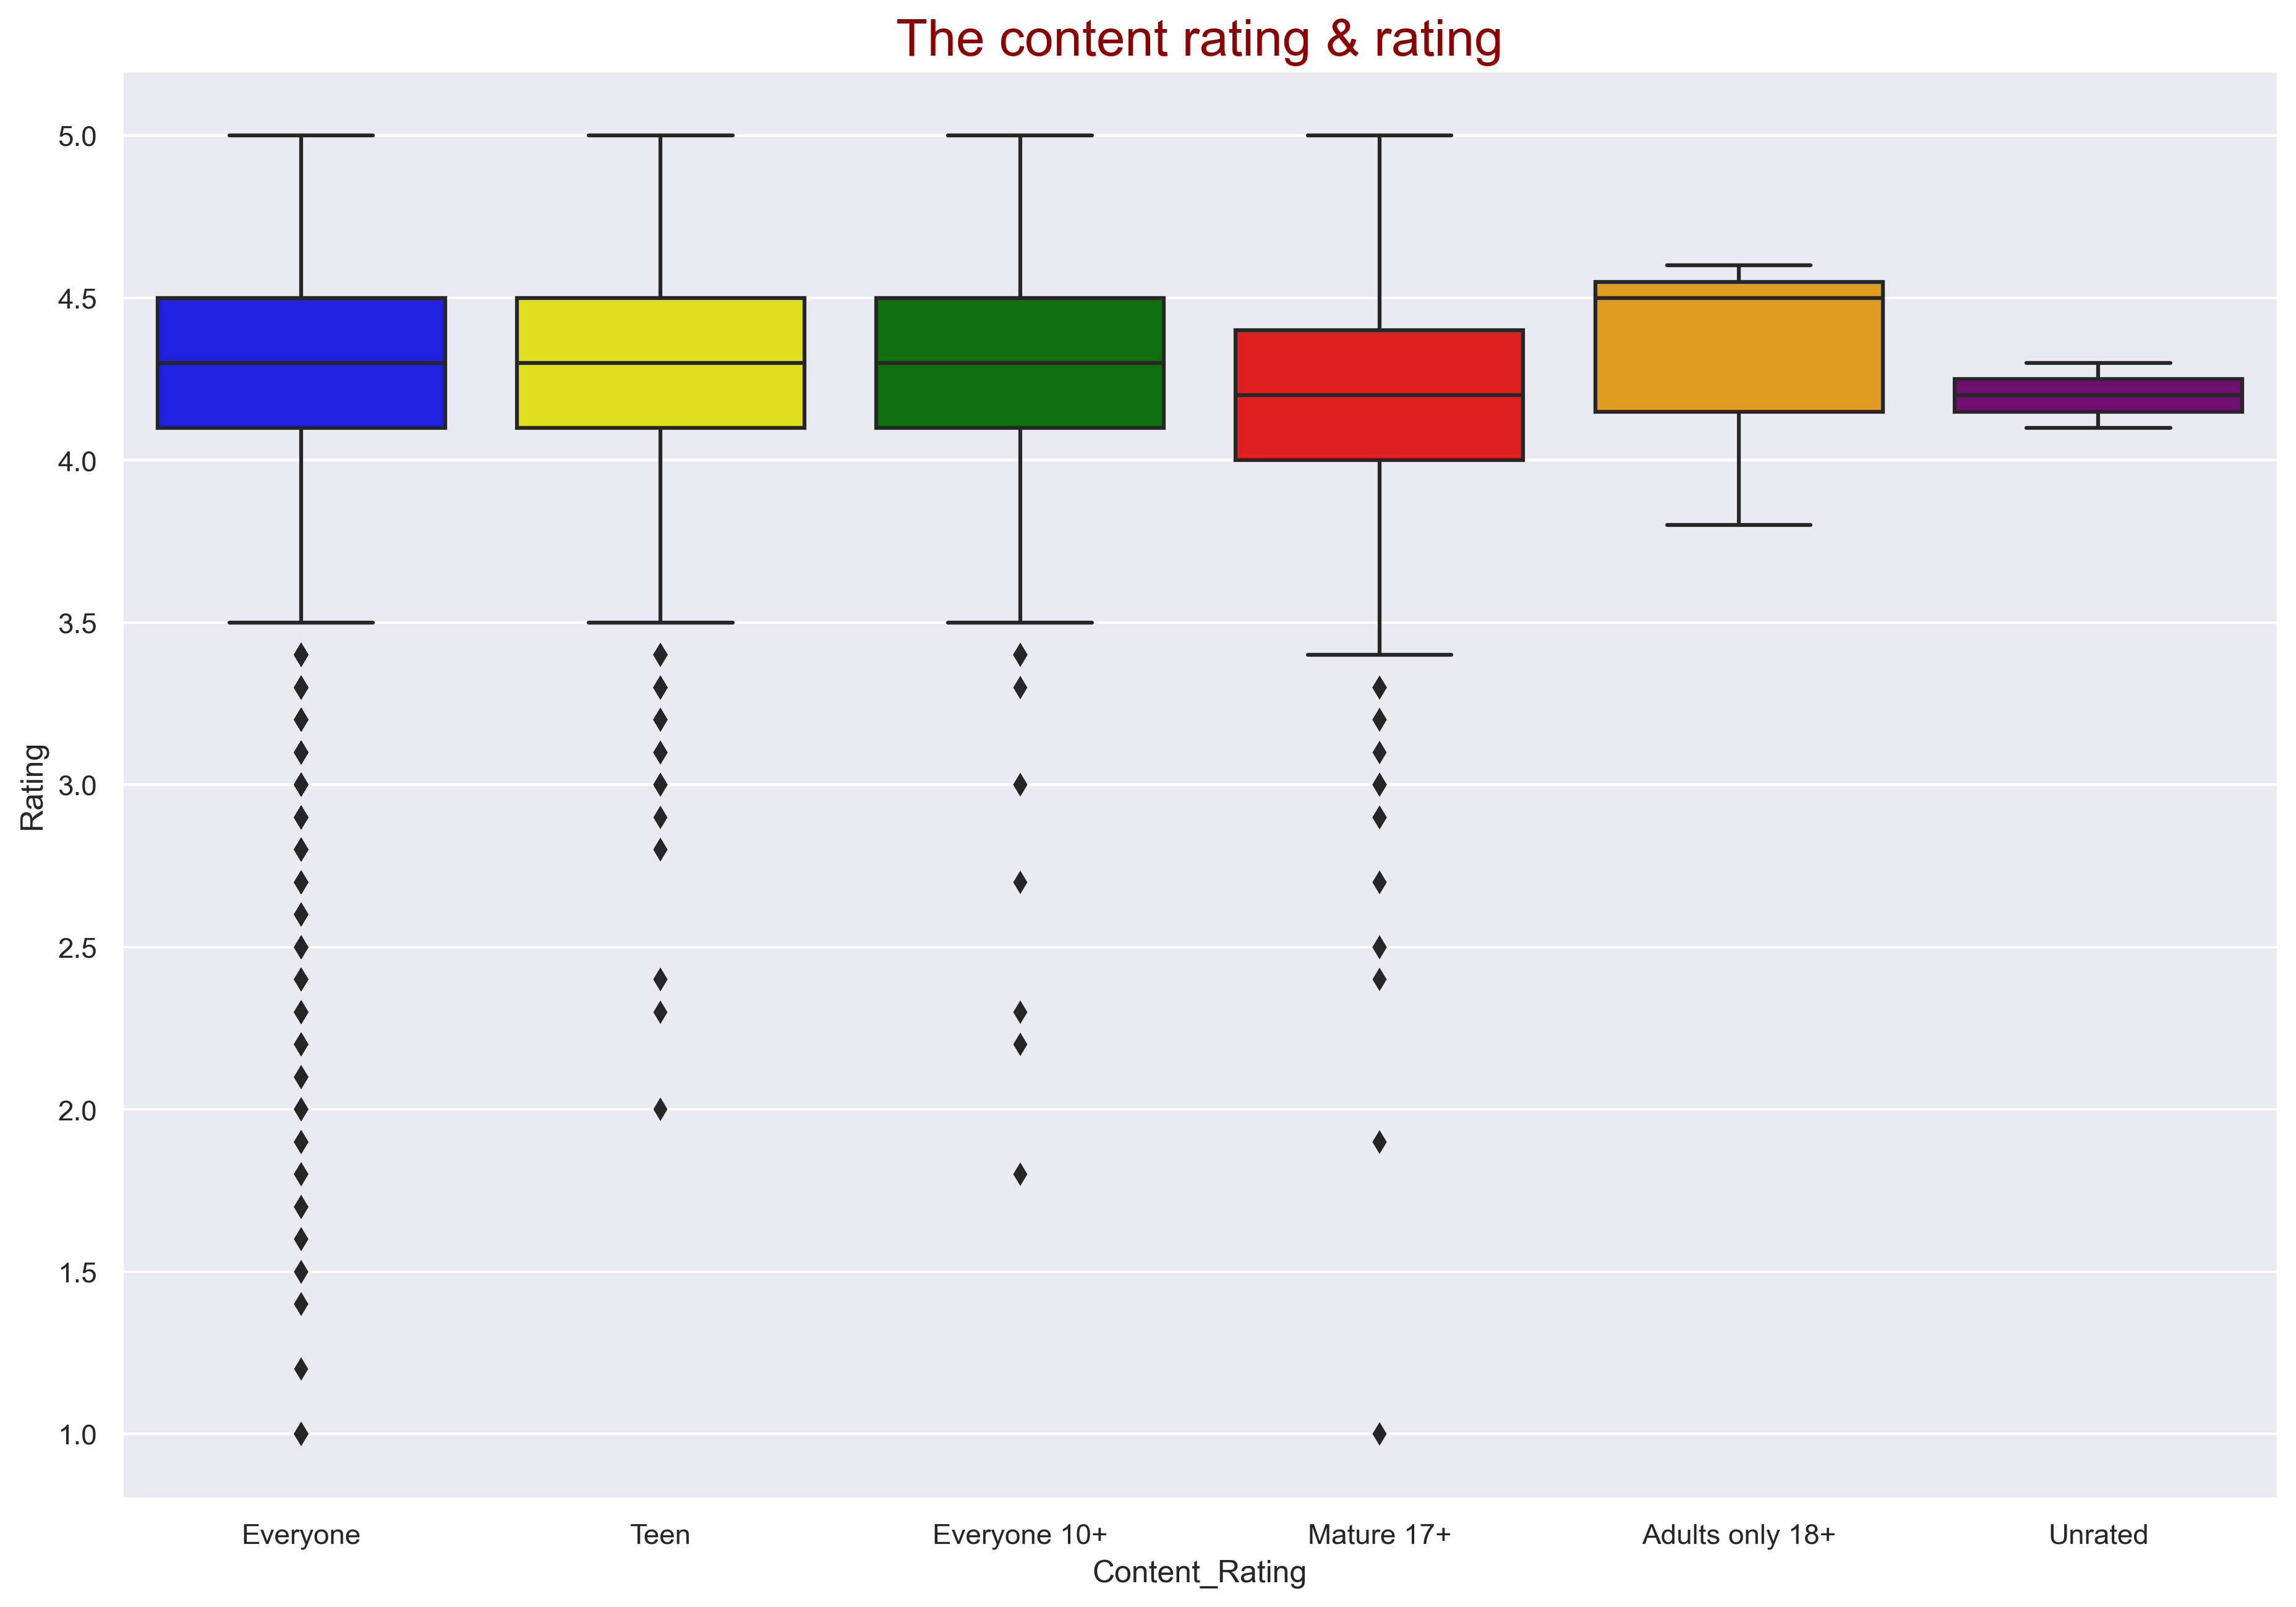

In [74]:

plt.figure(figsize=(15, 10))

# Draw a box plot with Seaborn
# 'x' and 'y' parameters determine which columns will be used
# The data frame is determined with the 'data' parameter
# Colors are determined for each "Content_Rating" category with the 'palette' parameter
sns.boxplot(x="Content_Rating", y="Rating", data=df, palette={"Everyone": "blue", 
                                                              "Teen": "yellow", 
                                                              "Everyone 10+": "green",
                                                              "Mature 17+": "red",
                                                              "Adults only 18+": "orange",
                                                              "Unrated": "purple"})

# Chart title and title properties
# A dictionary for the title is specified with the 'fontdict' parameter
# Sets the title size to 20 with the 'fontsize' key, and sets the title color to 'darkred' with the 'color' key
plt.title("The content rating & rating", fontdict={'fontsize': 20, 'color': 'darkred'})

plt.show()

As you can see, the ratings for "Everyone," "Teen," and "Everyone 10+" are almost the same.

"Everyone" has more outlier values compared to other categories.

"Mature 17+" has the lowest average rating, while the "Adults Only 18+" category has a higher average rating compared to the others.

## <font color='green'> <b>What Is the Number of Applications in Each Category?</b><font color='black'>

**Code Explanation**

**plt.figure(figsize=(15, 10)):** This line sets the size of the plot. The width is set to 15 units and the height is set to 10 units.

**sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index):** This line uses Seaborn's `countplot` function to create a horizontal bar plot showing the count of each unique value in the "Category" column. The `y` parameter specifies which column to use for the y-axis, and the `data` parameter specifies the DataFrame. The `order` parameter sorts the bars from the highest to the lowest count.

**plt.title("Kategoriye Göre Uygulama Sayıları", fontdict={'fontsize': 20, 'color': 'darkred'}):** This line sets the title of the plot and its properties. The `fontdict` parameter is used to specify the font size (20) and color ('darkred') of the title.

**plt.xlabel("Uygulama Sayısı") and plt.ylabel("Kategoriler"):** These lines set the labels for the x-axis and y-axis respectively.

**plt.show():** This line displays the plot.

In [75]:
category_counts = df['Category'].value_counts()
category_counts

Category
Family                 1939
Game                   1121
Tools                   841
Business                427
Medical                 408
Productivity            407
Personalization         386
Lifestyle               373
Communication           366
Finance                 360
Sports                  351
Photography             322
Health and fitness      306
Social                  280
News and magazines      264
Travel and local        237
Books and reference     229
Shopping                224
Dating                  196
Video players           175
Maps and navigation     137
Education               130
Food and drink          124
Entertainment           111
Auto and vehicles        85
Libraries and demo       84
Weather                  82
House and home           80
Events                   64
Art and design           64
Parenting                60
Comics                   60
Beauty                   53
Name: count, dtype: int64

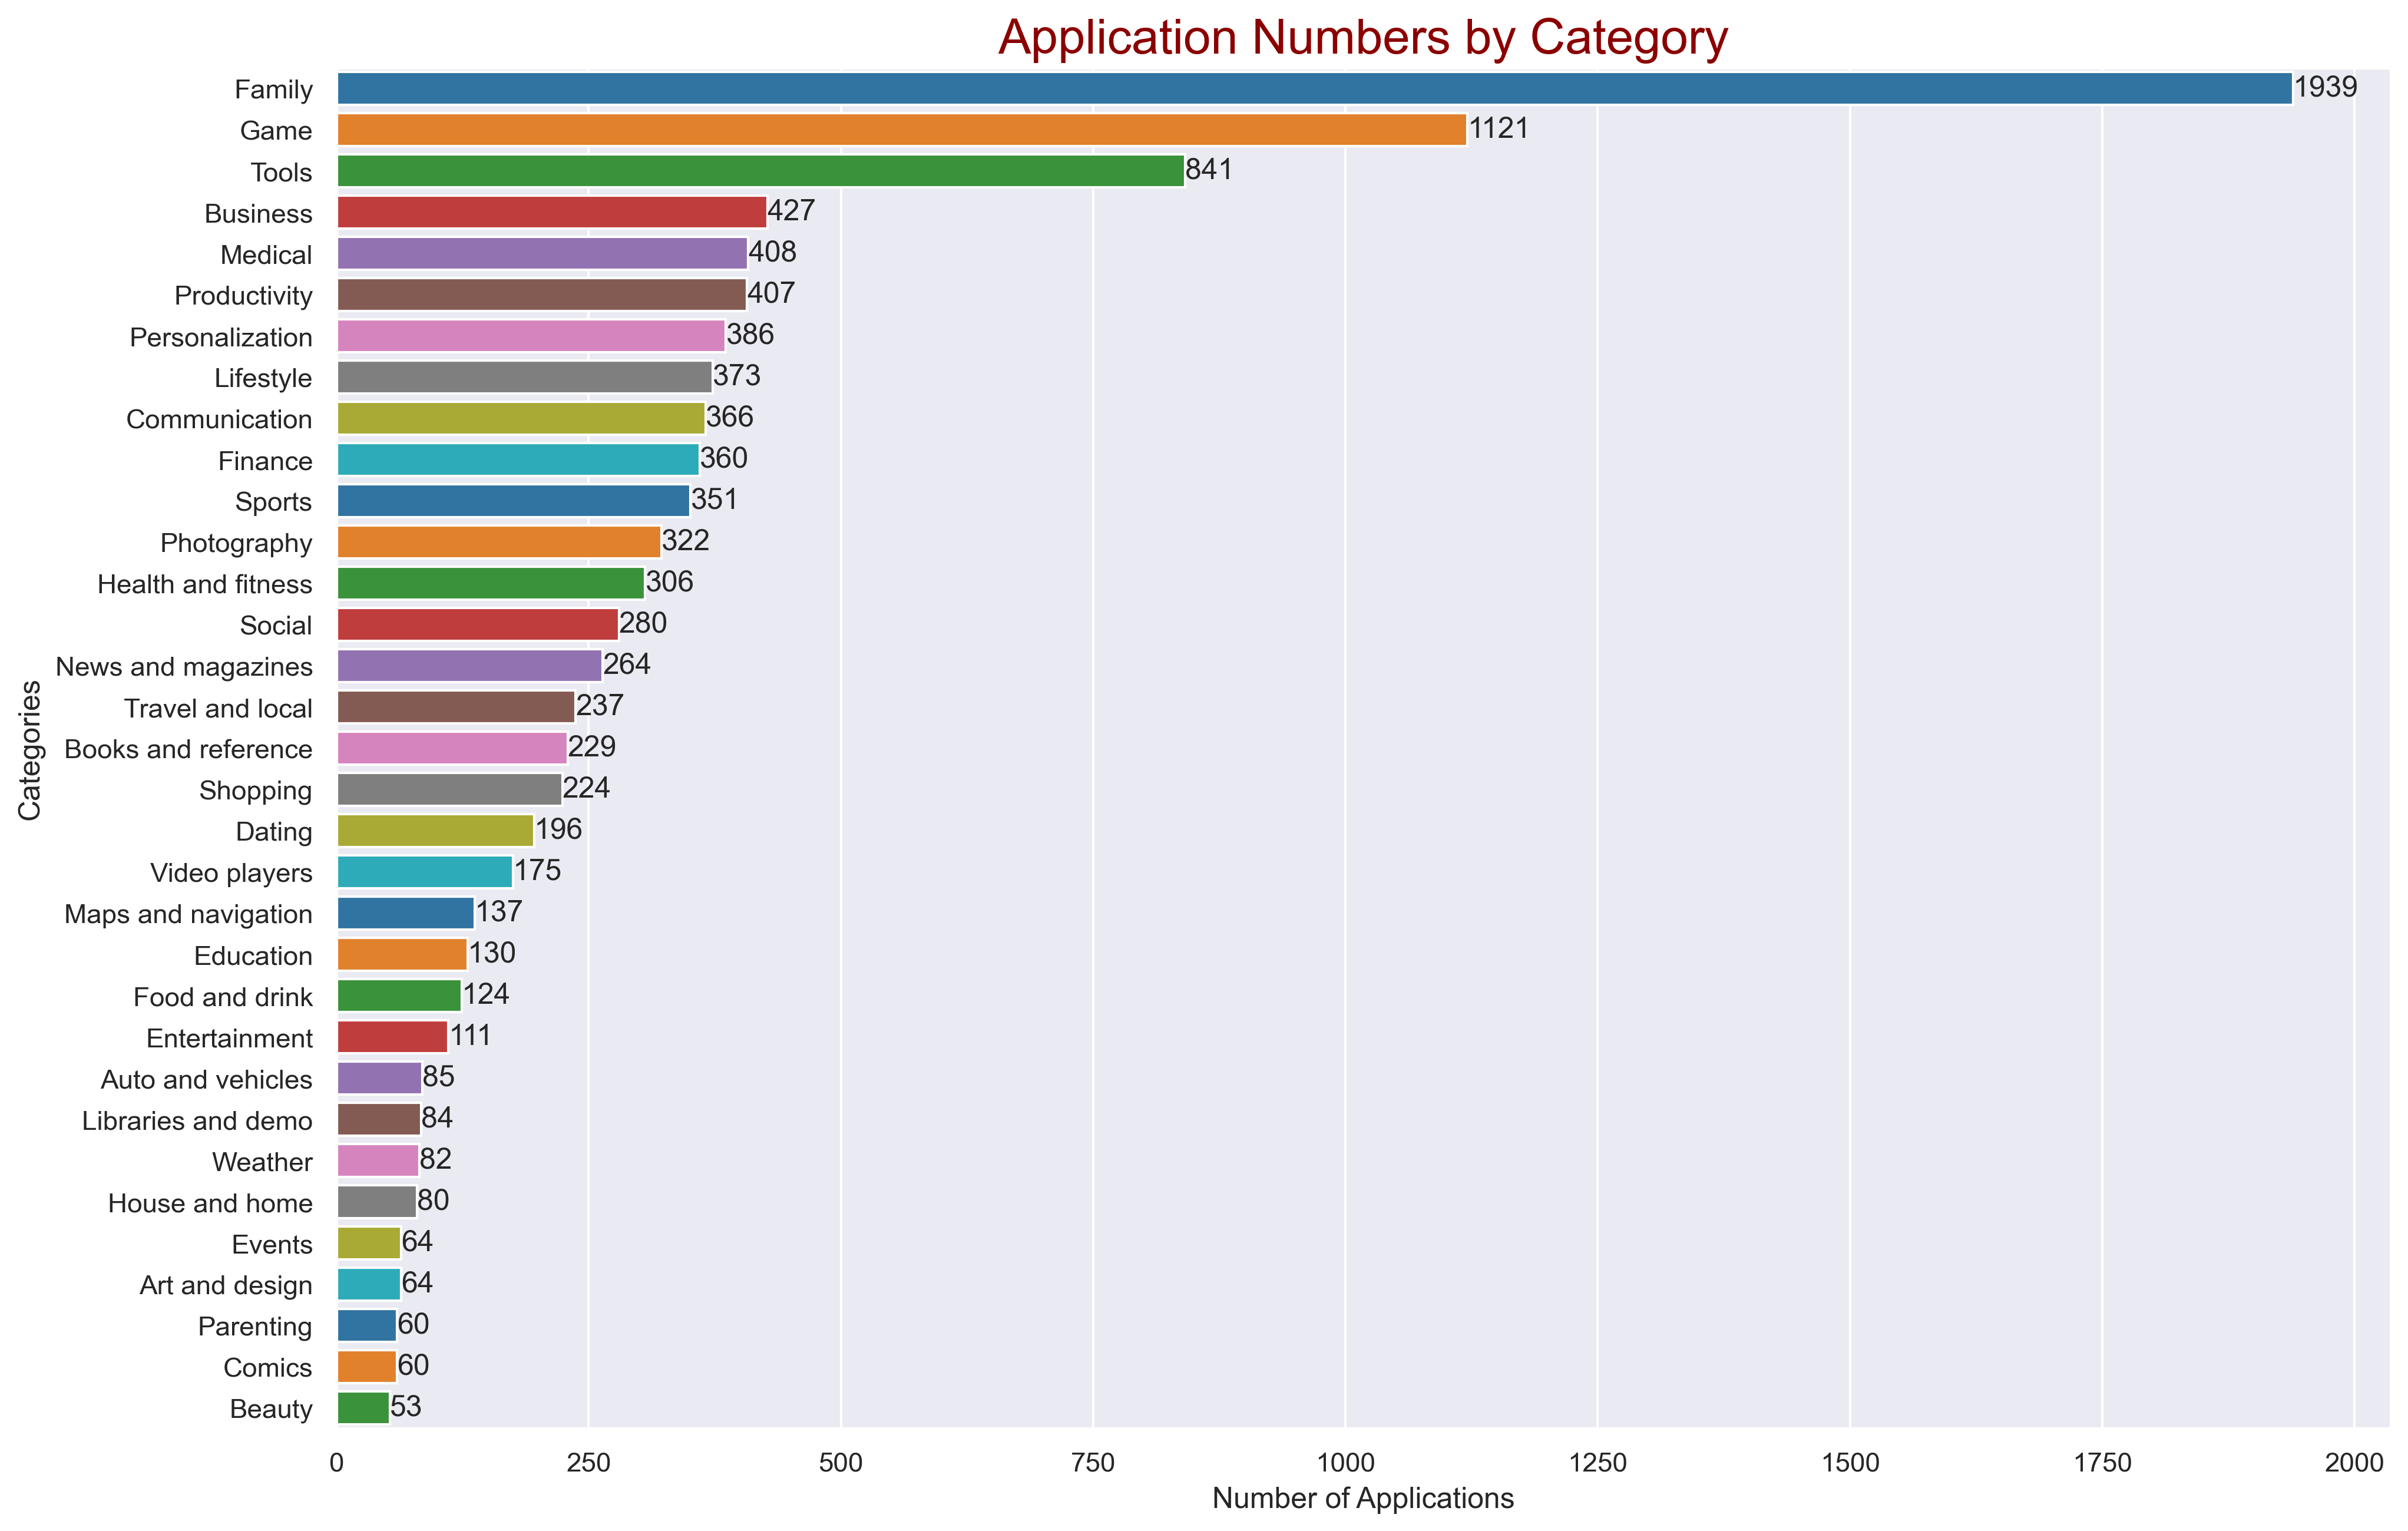

In [76]:

plt.figure(figsize=(15, 10))

# Draw a horizontal bar plot with Seaborn. If I say y, it will draw a horizontal bar plot because it will use the y axis.
# The 'y' parameter determines which column will be used, and the 'data' parameter determines the data frame
ax = sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index, palette='tab10')

for container in ax.containers:
    ax.bar_label(container)
    
# Chart title and title properties
plt.title("Application Numbers by Category", fontdict={'fontsize': 20, 'color': 'darkred'})

plt.xlabel("Number of Applications")
plt.ylabel("Categories")

plt.show()

The most applications are in the Family category, then Game, then Tools.

## <font color='green'> <b>Which Categories Have the Highest Total Spending in Apps?</b><font color='black'>



**We are plotting a bar chart showing the top 5 categories with the highest total spending on Google Play Store and the amount spent in these categories.**

**total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False): Calculate total spending by category:** This line groups the data by the 'Category' column and calculates the total spending for each category. The results are then sorted in descending order.

**top5_categories = total_spending_by_category.nlargest(5): Select the top 5 categories with the highest spending:** This line selects the top 5 categories with the highest total spending by sorting the values in descending order.

**plt.figure(figsize=(15, 10)): Draw the bar chart:** We draw a bar chart showing the top 5 selected categories and the total spending in those categories, setting the plot size to (15, 10).

**plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Top 5 Categories with Highest Spending')
Axis labels and title:** We add labels to the x-axis as 'Category' and to the y-axis as 'Total Spending'. The chart title is set to 'Top 5 Categories with Highest Spending'.

**plt.show(): Display the chart:** This line displays the chart on the screen.

- Which categories have the highest total spending?

- Which categories might have higher pricing strategies?

In [77]:
# Kategorilere göre toplam harcamayı hesapla
total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False)
total_spending_by_category

Category
Finance                2900.83
Family                 2419.83
Lifestyle              2360.87
Medical                1020.69
Game                    287.30
Tools                   266.26
Productivity            250.93
Business                175.29
Personalization         149.98
Photography             122.23
Books and reference     119.77
Events                  109.99
Sports                  100.00
Communication            83.14
Health and fitness       64.35
Travel and local         49.95
Weather                  32.42
Dating                   31.43
Maps and navigation      26.95
Education                17.96
Social                   15.97
Auto and vehicles        13.47
Video players            10.46
Parenting                 9.58
Food and drink            8.48
Entertainment             7.98
Art and design            5.97
Shopping                  5.48
News and magazines        3.98
Libraries and demo        0.99
Comics                    0.00
Beauty                    0.00

In [78]:
top5_categories = total_spending_by_category.nlargest(5)
top5_categories

Category
Finance      2900.83
Family       2419.83
Lifestyle    2360.87
Medical      1020.69
Game          287.30
Name: Price, dtype: float64

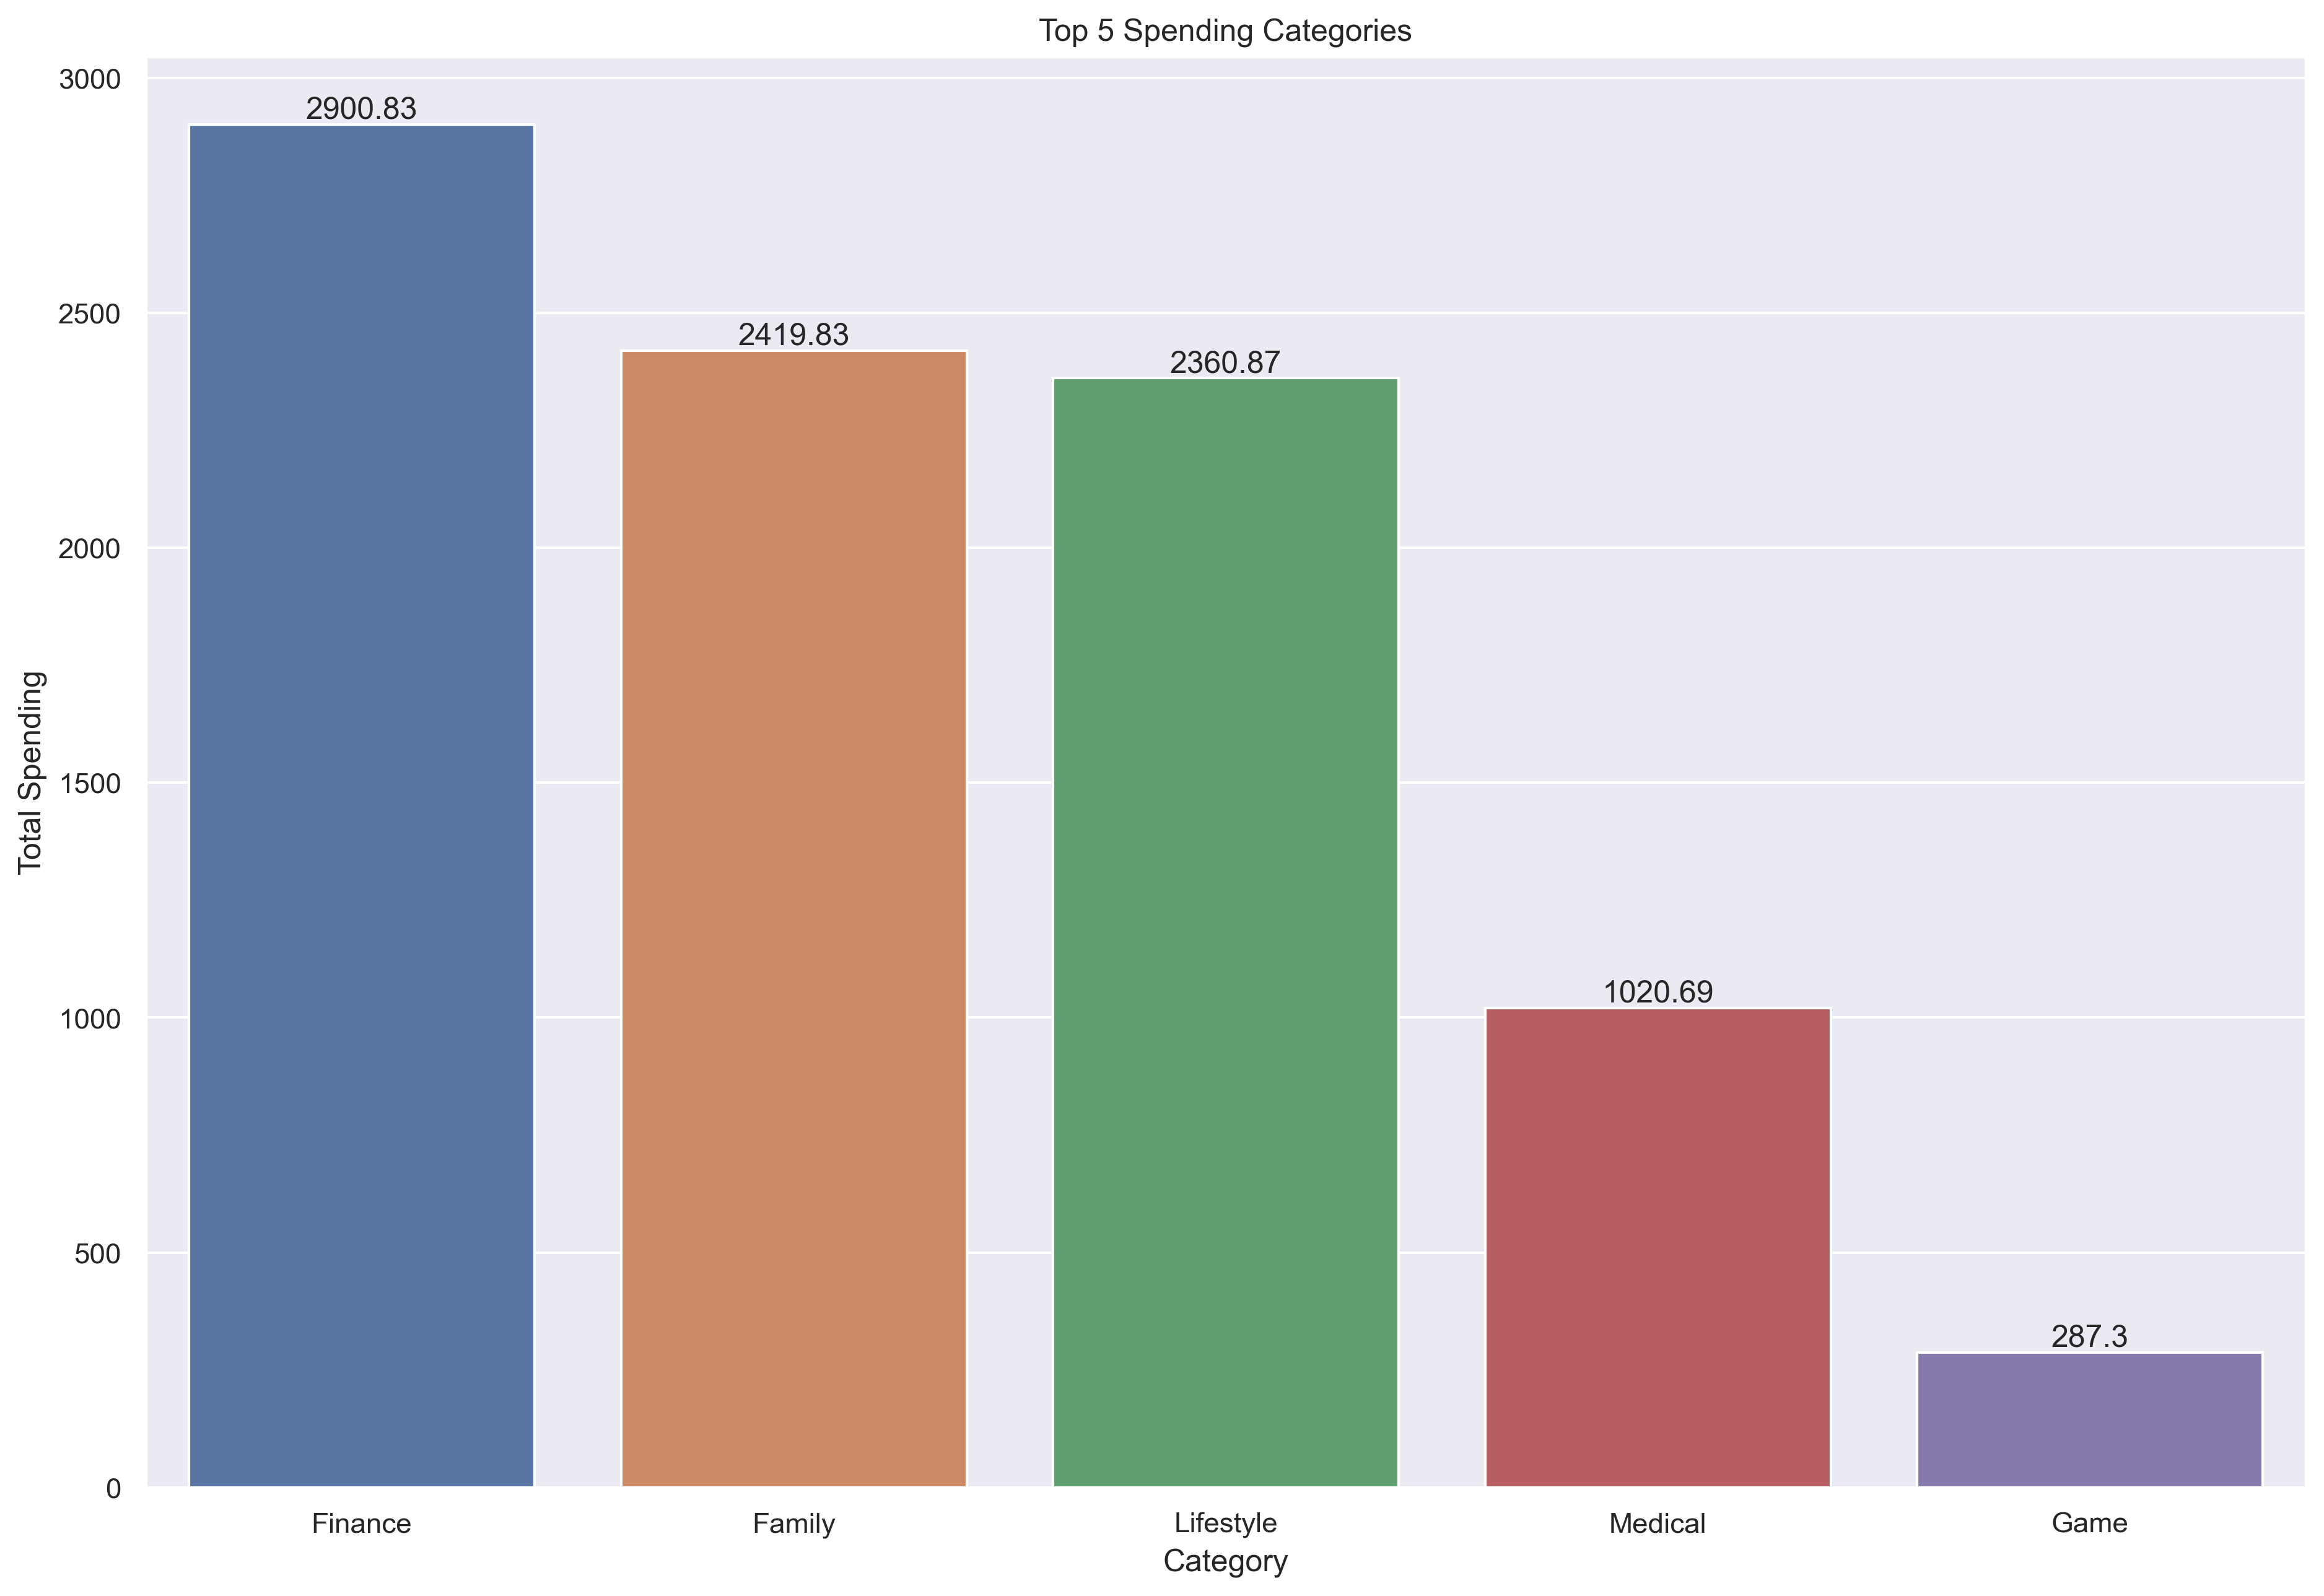

In [79]:

plt.figure(figsize=(15, 10))
ax = sns.barplot(x=top5_categories.index, y=top5_categories.values, order=top5_categories.index)

plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Top 5 Spending Categories')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

## <font color='green'> <b>What Are the Most Common Words in the Names of Google Play Store Apps?</b><font color='black'>

**We want to get an idea of which words or terms are frequently used in the Google Play Store.**

**text = ' '.join(df['App'])**: This line combines all the app names from the "App" column in the dataframe (`df`) into a single large text, with each name separated by a space.

**wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)**: Using the combined text, we create a word cloud. The dimensions of the word cloud are set to 800x400, and the background color is set to white. The `generate()` method creates the word cloud from the text.

**plt.figure(figsize=(10, 5))**: This sets the size of the visualization. The width is 10 units, and the height is 5 units.

**plt.imshow(wordcloud, interpolation='bilinear')**: We use the `imshow()` function to display the word cloud. "Bilinear" interpolation makes the image appear smoother.

**plt.axis('off')**: This hides the axis information on the plot. Therefore, the x and y axis labels and numbers will not be displayed.

**plt.title('Google Play Store Apps Word Cloud')**: This sets the title of the visualization.

**plt.show()**: This displays the visualization on the screen.

The word cloud shows which words or terms are commonly used in the app names on the Google Play Store.

Words that occur frequently will appear larger and more prominently.

This type of visualization is often used to quickly and effectively see which words or terms are most common in the text.

- Which words or terms are frequently used in app names?
- What are the characteristic words or terms for a specific category or type? (If you have filtered the data by category)
- Is there a particular niche or trend in the market?

This type of analysis can be useful for app developers, for example, when choosing an app name or assessing competition in the market.

In [80]:
# pip install wordcloud

In [81]:
from wordcloud import WordCloud

In [82]:
# Combine all app names in the 'App' column
text = ' '.join(df['App'])
text

'Photo Editor & Candy Camera & Grid & ScrapBook Coloring book moana U Launcher Lite – FREE Live Cool Themes, Hide Apps Sketch - Draw & Paint Pixel Draw - Number Art Coloring Book Paper flowers instructions Smoke Effect Photo Maker - Smoke Editor Infinite Painter Garden Coloring Book Kids Paint Free - Drawing Fun Text on Photo - Fonteee Name Art Photo Editor - Focus n Filters Tattoo Name On My Photo Editor Mandala Coloring Book 3D Color Pixel by Number - Sandbox Art Coloring Photo Designer - Write your name with shapes 350 Diy Room Decor Ideas FlipaClip - Cartoon animation ibis Paint X Logo Maker - Small Business Boys Photo Editor - Six Pack & Men\'s Suit Superheroes Wallpapers | 4K Backgrounds Mcqueen Coloring pages HD Mickey Minnie Wallpapers Harley Quinn wallpapers HD Colorfit - Drawing & Coloring Animated Photo Editor Pencil Sketch Drawing Easy Realistic Drawing Tutorial Pink Silver Bow Keyboard Theme Art Drawing Ideas Anime Manga Coloring Book Easy Origami Ideas I Creative Idea How

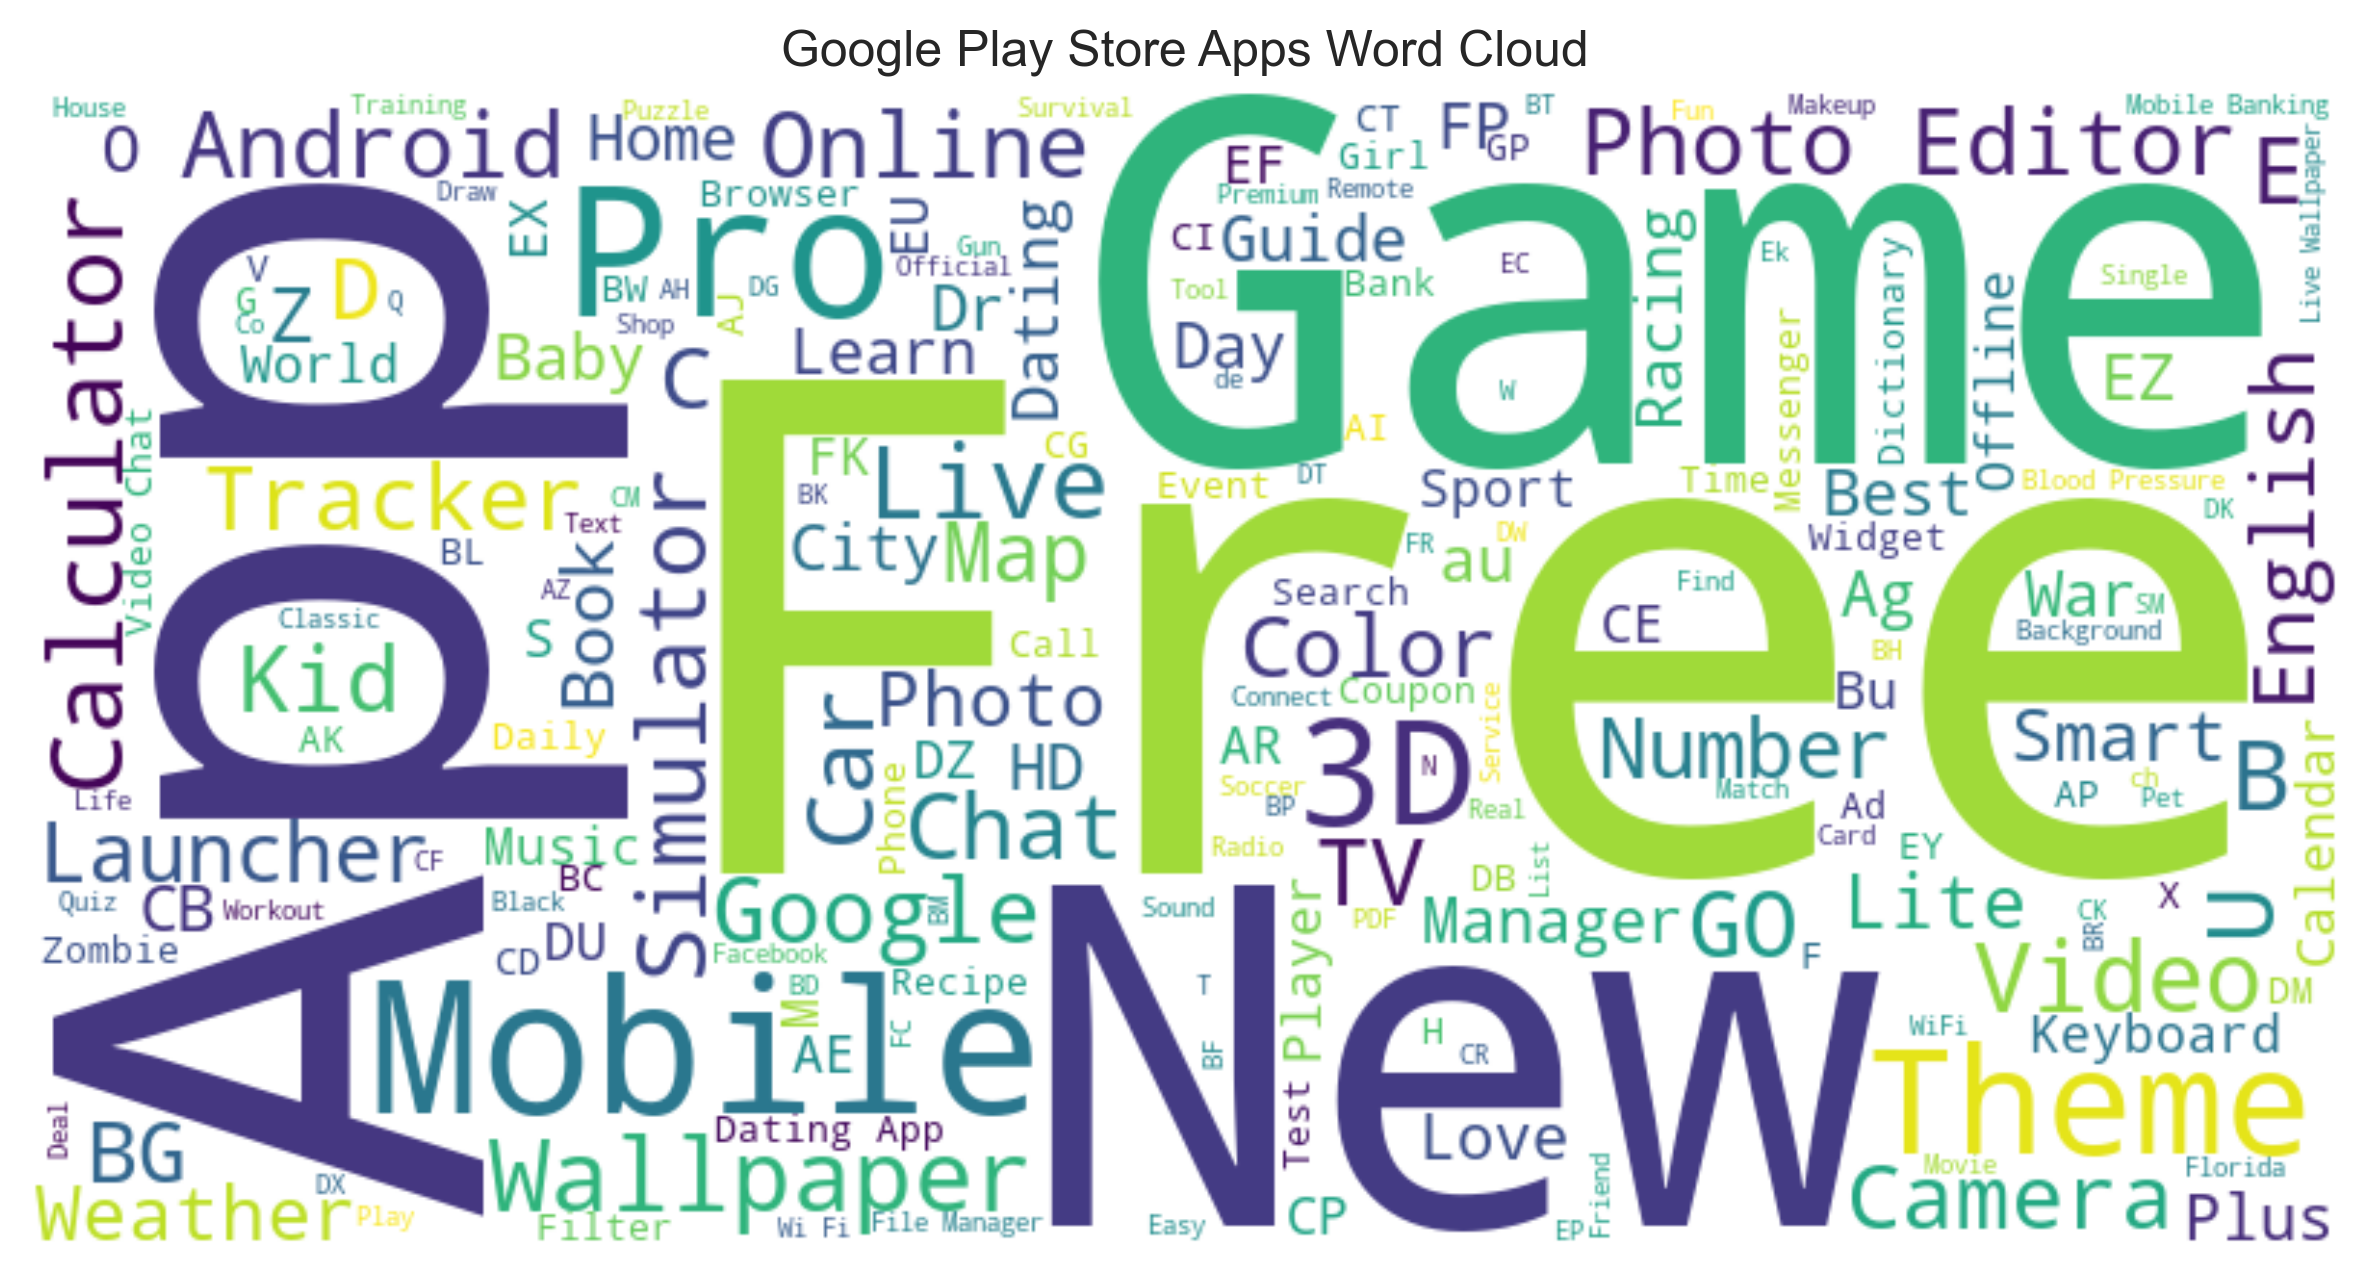

In [83]:
# Create WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Set chart properties
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Google Play Store Apps Word Cloud')
plt.show()

The **`imshow()`** function in Matplotlib has several options for the `interpolation` parameter. These options control how the image is displayed. Here are some examples:

**1. nearest:** Nearest-neighbor interpolation. It is fast but may result in lower quality.

**2. bilinear:** Bilinear interpolation. It is of good quality and generally fast.

**3. bicubic:** Bicubic interpolation. Provides higher quality but may be slower.

**4. spline16:** 4x4 B-spline interpolation.

**5. spline36:** 6x6 B-spline interpolation.

**6. hanning, hamming, hermite, kaiser:** Interpolation using different window functions.

**7. lanczos:** Lanczos interpolation, which provides high quality but can be slow.

**8. none:** No interpolation is applied.

There are a few other options as well. The choice depends on the balance between image quality and speed. Bilinear usually offers a good balance, but methods like bicubic or lanczos can be used if higher quality is required.

## <font color='green'> <b>Which Categories Show Low Installs with High Ratings in Google Play Store?</b><font color='black'>

1. **Group by 'Category'**: The DataFrame `df` is grouped by the 'Category' column. This operation aggregates the data for each unique category.

2. **Aggregate Functions**:
   - **'Rating': 'mean'**: The mean user rating is calculated for each category. This reflects the overall user satisfaction within that category.
   - **'Installs': 'sum'**: The total number of app installs is calculated for each category. This indicates the general popularity or user acceptance of that category.

3. **Sort Values**: The resulting data is sorted first by the 'Installs' column in ascending order and then by the 'Rating' column in descending order. This sorting helps identify categories with high ratings despite low install numbers.

The information obtained from these operations provides strategic opportunities for developers by identifying categories with low competition and high user satisfaction, making them ideal for developing new applications.

In [84]:
low_competition_cat = df.groupby('Category')[['Rating', 'Installs']].agg({
    'Rating':
    'mean',
    'Installs':
    'sum'
}).sort_values(['Installs', 'Rating'], ascending=[True, False])

low_competition_cat['Installs'] = round(
    low_competition_cat['Installs'] / 1000000, 2)

low_competition_cat

Rating  Installs
Category                               
Events               4.395313     15.97
Beauty               4.283019     27.20
Parenting            4.300000     31.52
Medical              4.212990     42.20
Auto and vehicles    4.205882     53.13
Comics               4.160000     56.09
Libraries and demo   4.208333     62.00
Art and design       4.373437    124.33
House and home       4.185000    125.21
Dating               4.033673    206.54
Food and drink       4.183871    257.90
Weather              4.248780    426.10
Education            4.375385    533.95
Lifestyle            4.133244    534.82
Maps and navigation  4.075182    724.28
Finance              4.148056    770.35
Business             4.175176    863.66
Health and fitness   4.266993   1361.02
Sports               4.239031   1528.57
Books and reference  4.336681   1916.47
Personalization      4.326425   2074.48
Entertainment        4.136036   2455.66
Shopping             4.256250   2573.35
News and magazines   4.160985   5393.22
Video players        4.084000   6222.00
Travel and local     4.121941   6361.89
Photography          4.189441   9721.25
Family               4.203713  10041.63
Tools                4.079667  11452.27
Productivity         4.219410  12463.09
Social               4.260714  12513.87
Communication        4.175410  24152.28
Game                 4.282070  31544.02

1. **Scatter Plot Drawing**: A scatter plot is created using the `sns.scatterplot` function, with the 'Rating' column on the x-axis and the 'Installs' column on the y-axis. Each category is represented by a different color, and the size of the circles varies according to the rating.

2. **Legend Settings**:
   - **ax.get_legend_handles_labels()**: Retrieves the handles (control elements) and labels of the current legend.
   - **ax.legend(...)**: Configures the legend to display only the first 11 items and hides large-sized labels. The legend is placed outside the plot area, in the upper right corner.

3. **Display**: The plot is displayed on the screen using the `plt.show()` function.

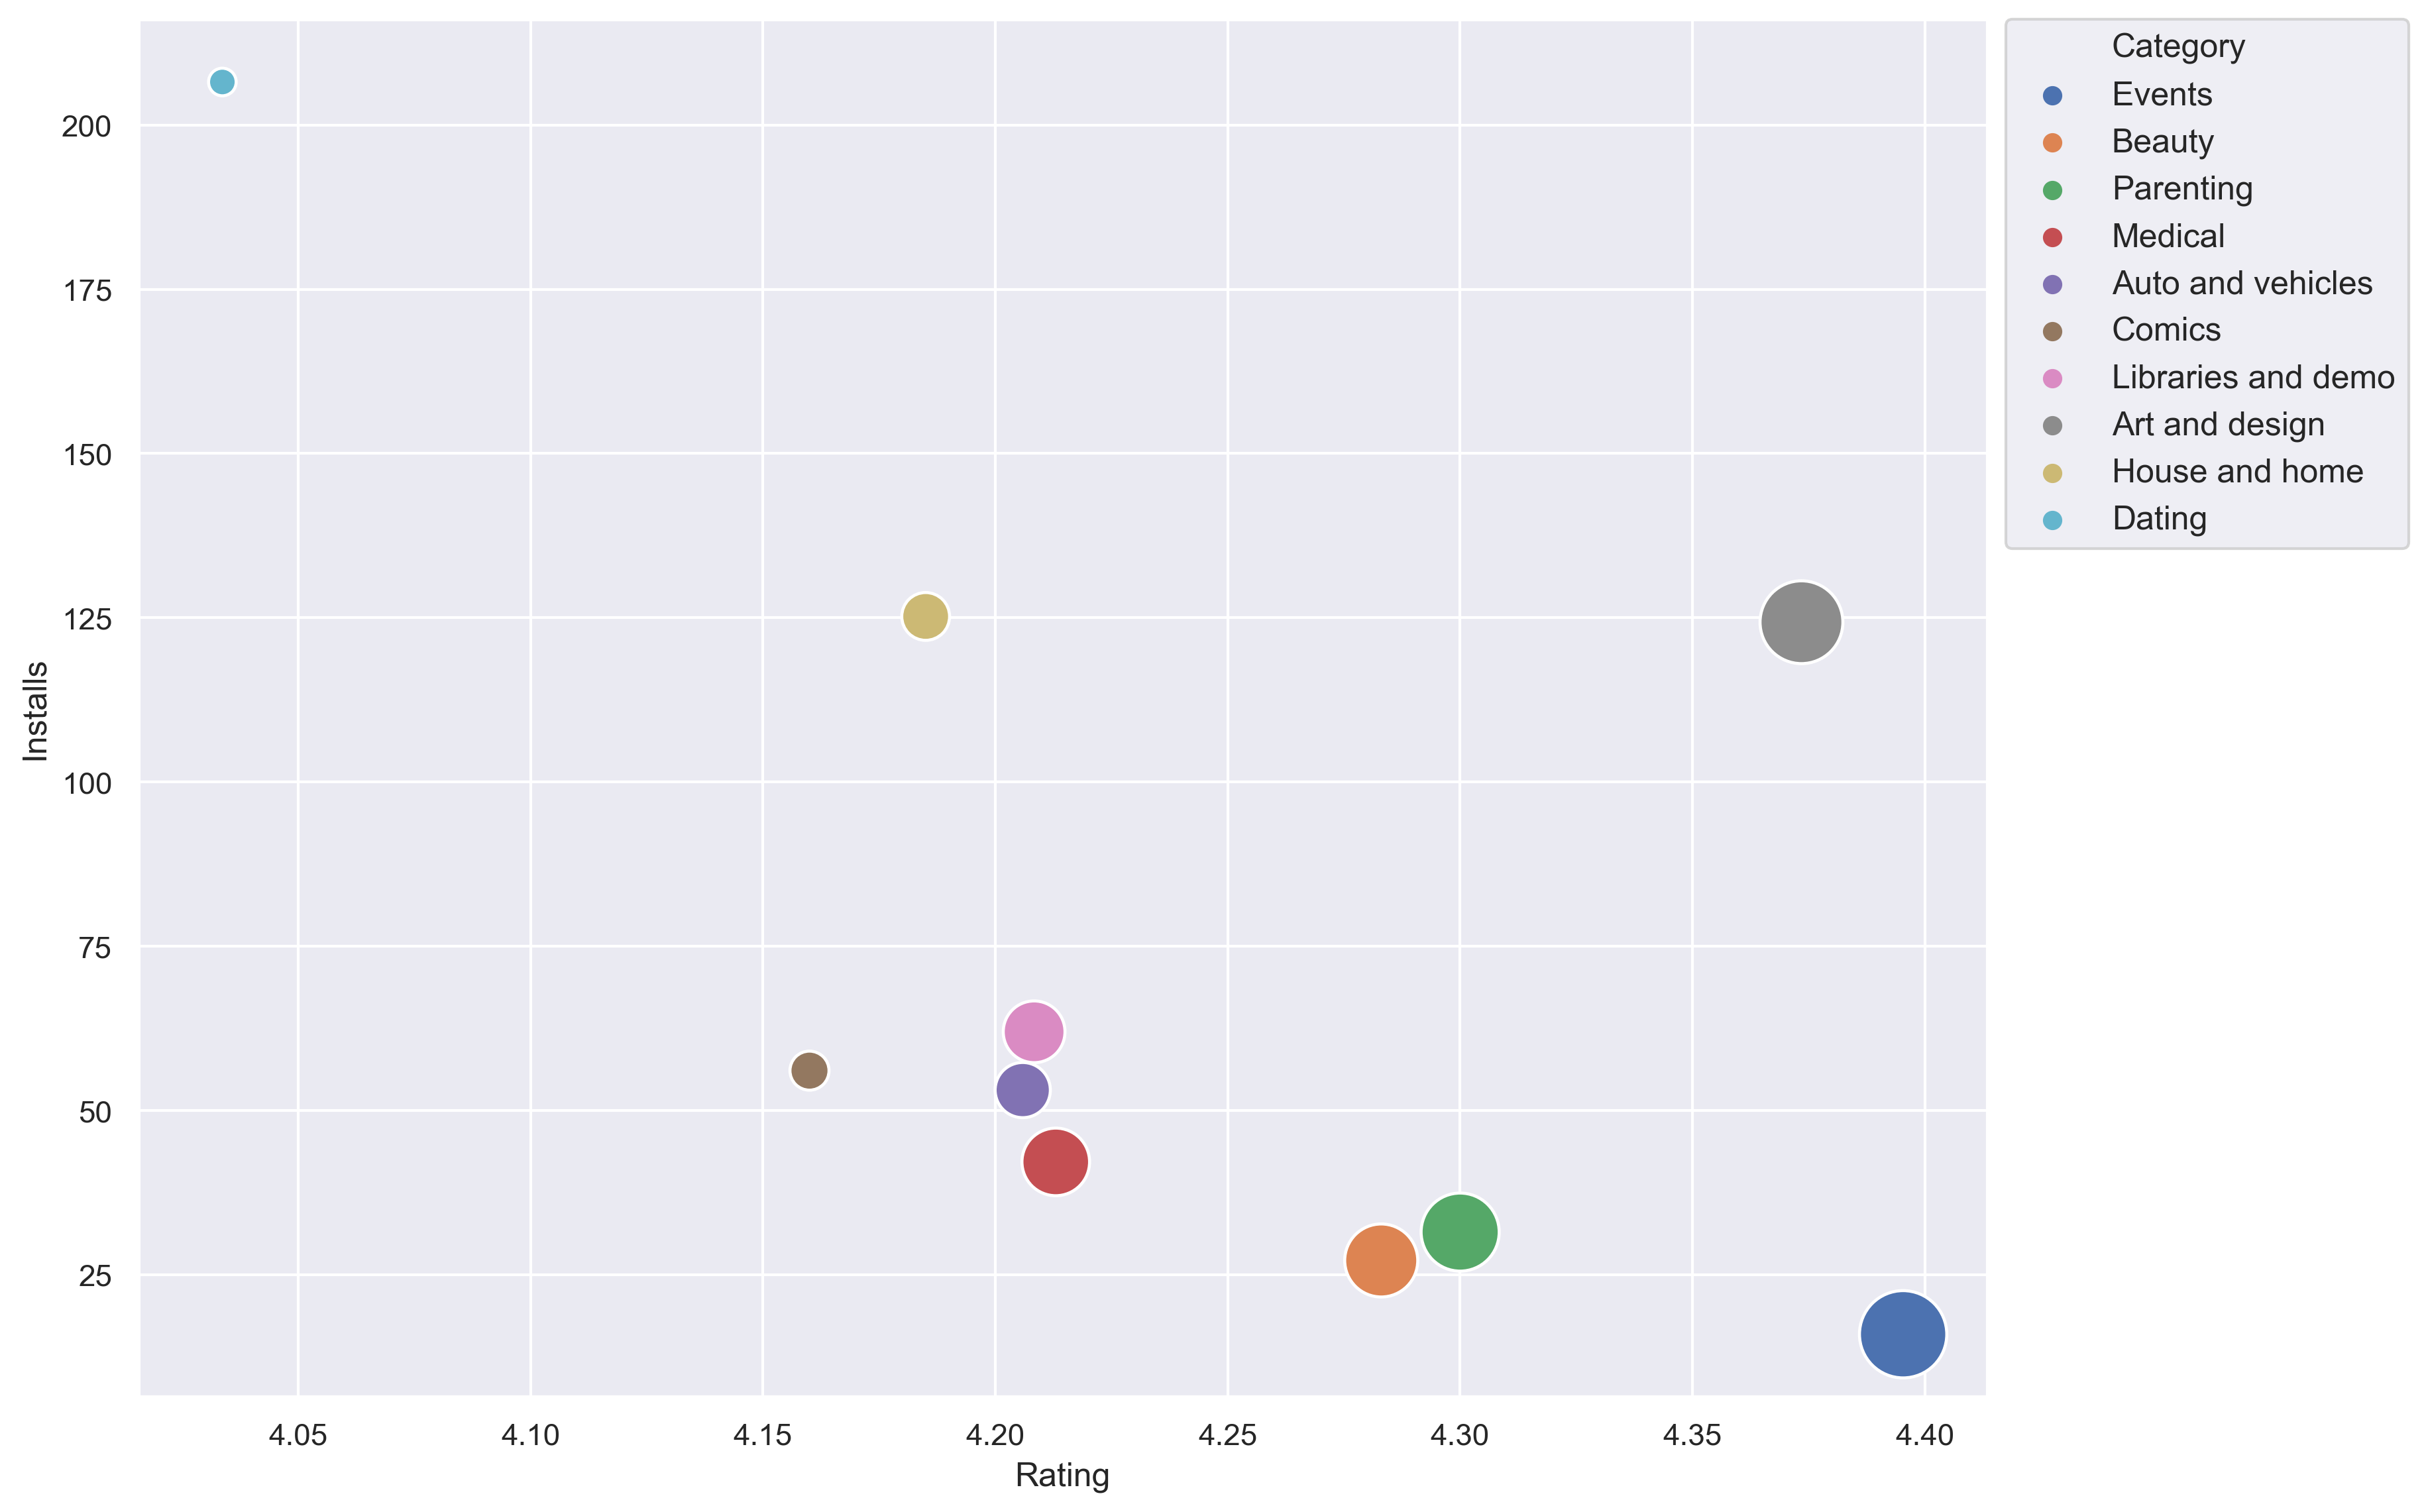

In [85]:
ax = sns.scatterplot(data=low_competition_cat[:10], x='Rating',
                y='Installs', hue='Category', size='Rating', sizes=[s for s in range(100,1200,100)], legend=True)

h, l = ax.get_legend_handles_labels()

ax.legend(h[0:11], l[0:11], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

## <font color='green'> <b>How Strong Is the Correlation Between Ratings and Number of Reviews for Apps?</b><font color='black'>

In [86]:
df.groupby('Rating')['Reviews'].sum()

Rating
1.0            28
1.2            44
1.4            98
1.5            61
1.6           691
1.7          2360
1.8          3418
1.9          2828
2.0          2997
2.1          3073
2.2          1979
2.3          2361
2.4         14829
2.5         14807
2.6          3761
2.7         25048
2.8        124730
2.9         57937
3.0        162618
3.1        320836
3.2        228320
3.3       1549019
3.4        958238
3.5       1565333
3.6       1797409
3.7       8646427
3.8      10756081
3.9      13564710
4.0     223602758
4.1     228915549
4.2     192300285
4.3     600892056
4.4     868505306
4.5    1158893777
4.6     675532724
4.7     189812069
4.8      23349249
4.9       2312993
5.0          2384
Name: Reviews, dtype: int64

Correlation coff: 0.0634718719777251


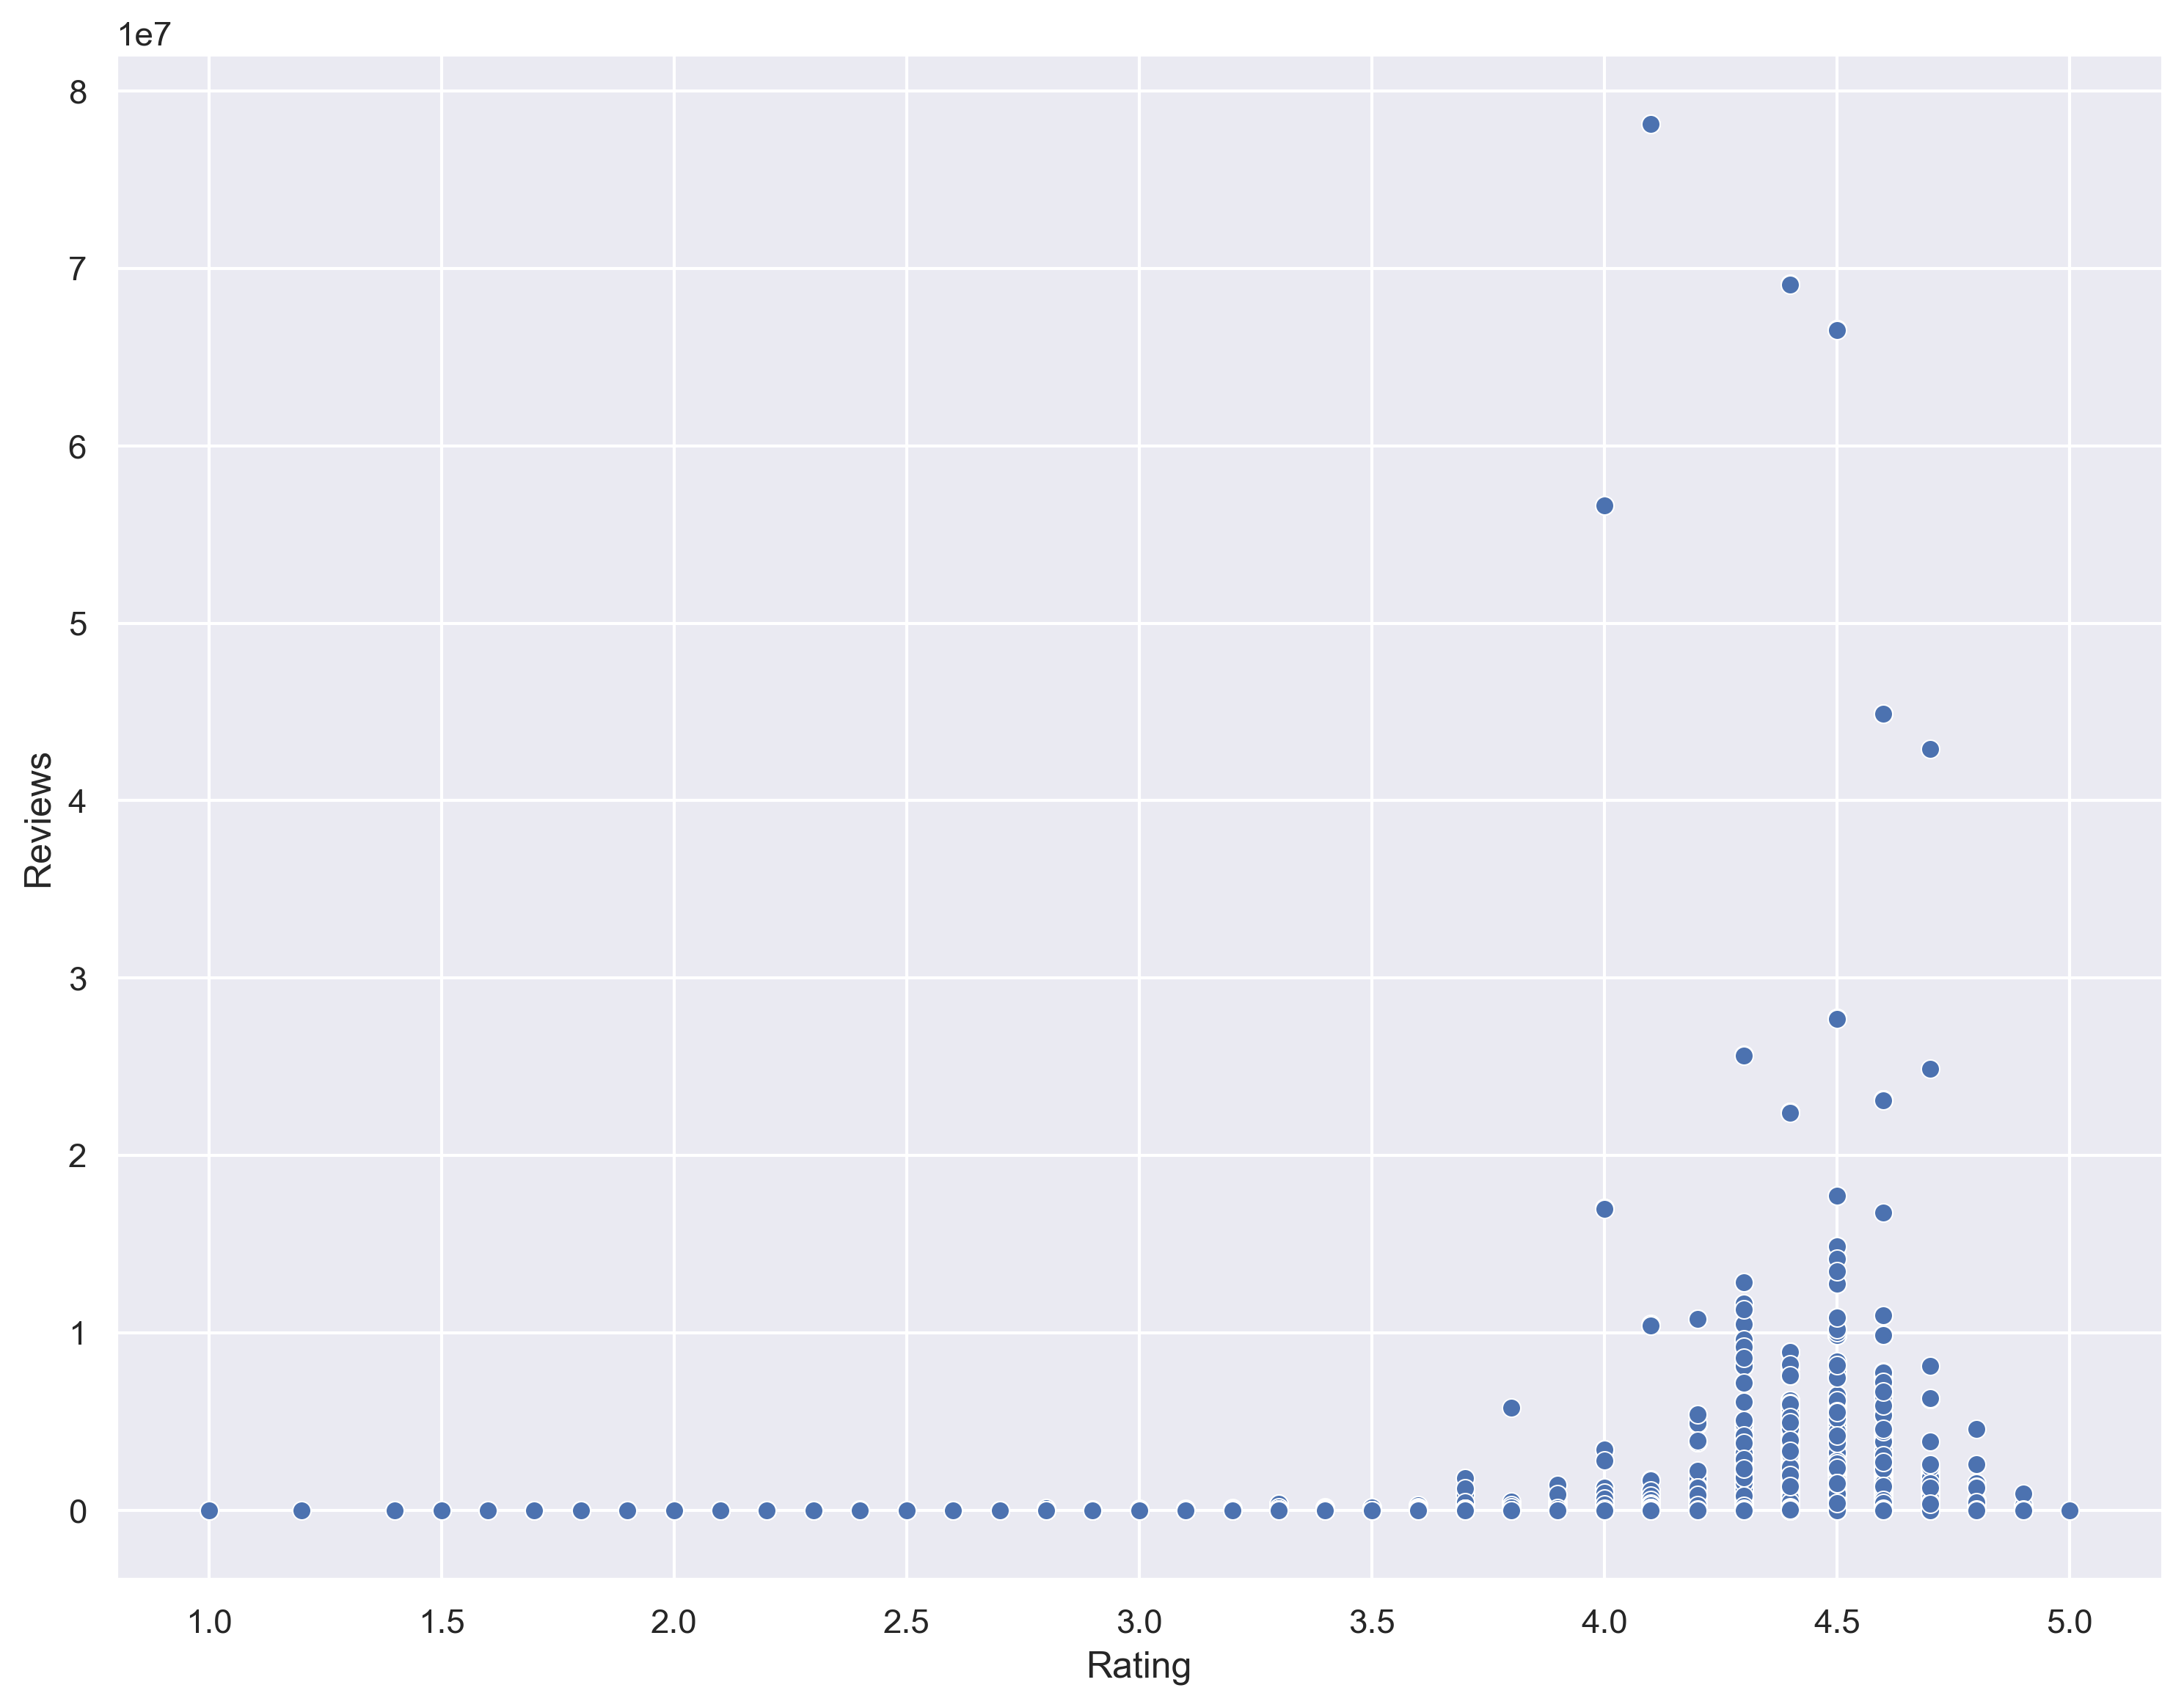

In [87]:
sns.scatterplot(data=df, x='Rating', y='Reviews')

print('Correlation coff:', df['Reviews'].corr(df['Rating']))

In the visual, the expression "1e7" represents scientific notation in mathematics, which means \(1 \times 10^7\).

This notation is commonly used to display very large or very small numbers in a more readable format.

Here, "1e7" on the y-axis for "Reviews" signifies 10,000,000 reviews.

## <font color='green'> <b>How Do Content Ratings Correlate with App Categories?</b><font color='black'>

In [88]:
df['Content_Rating'].value_counts()

Content_Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

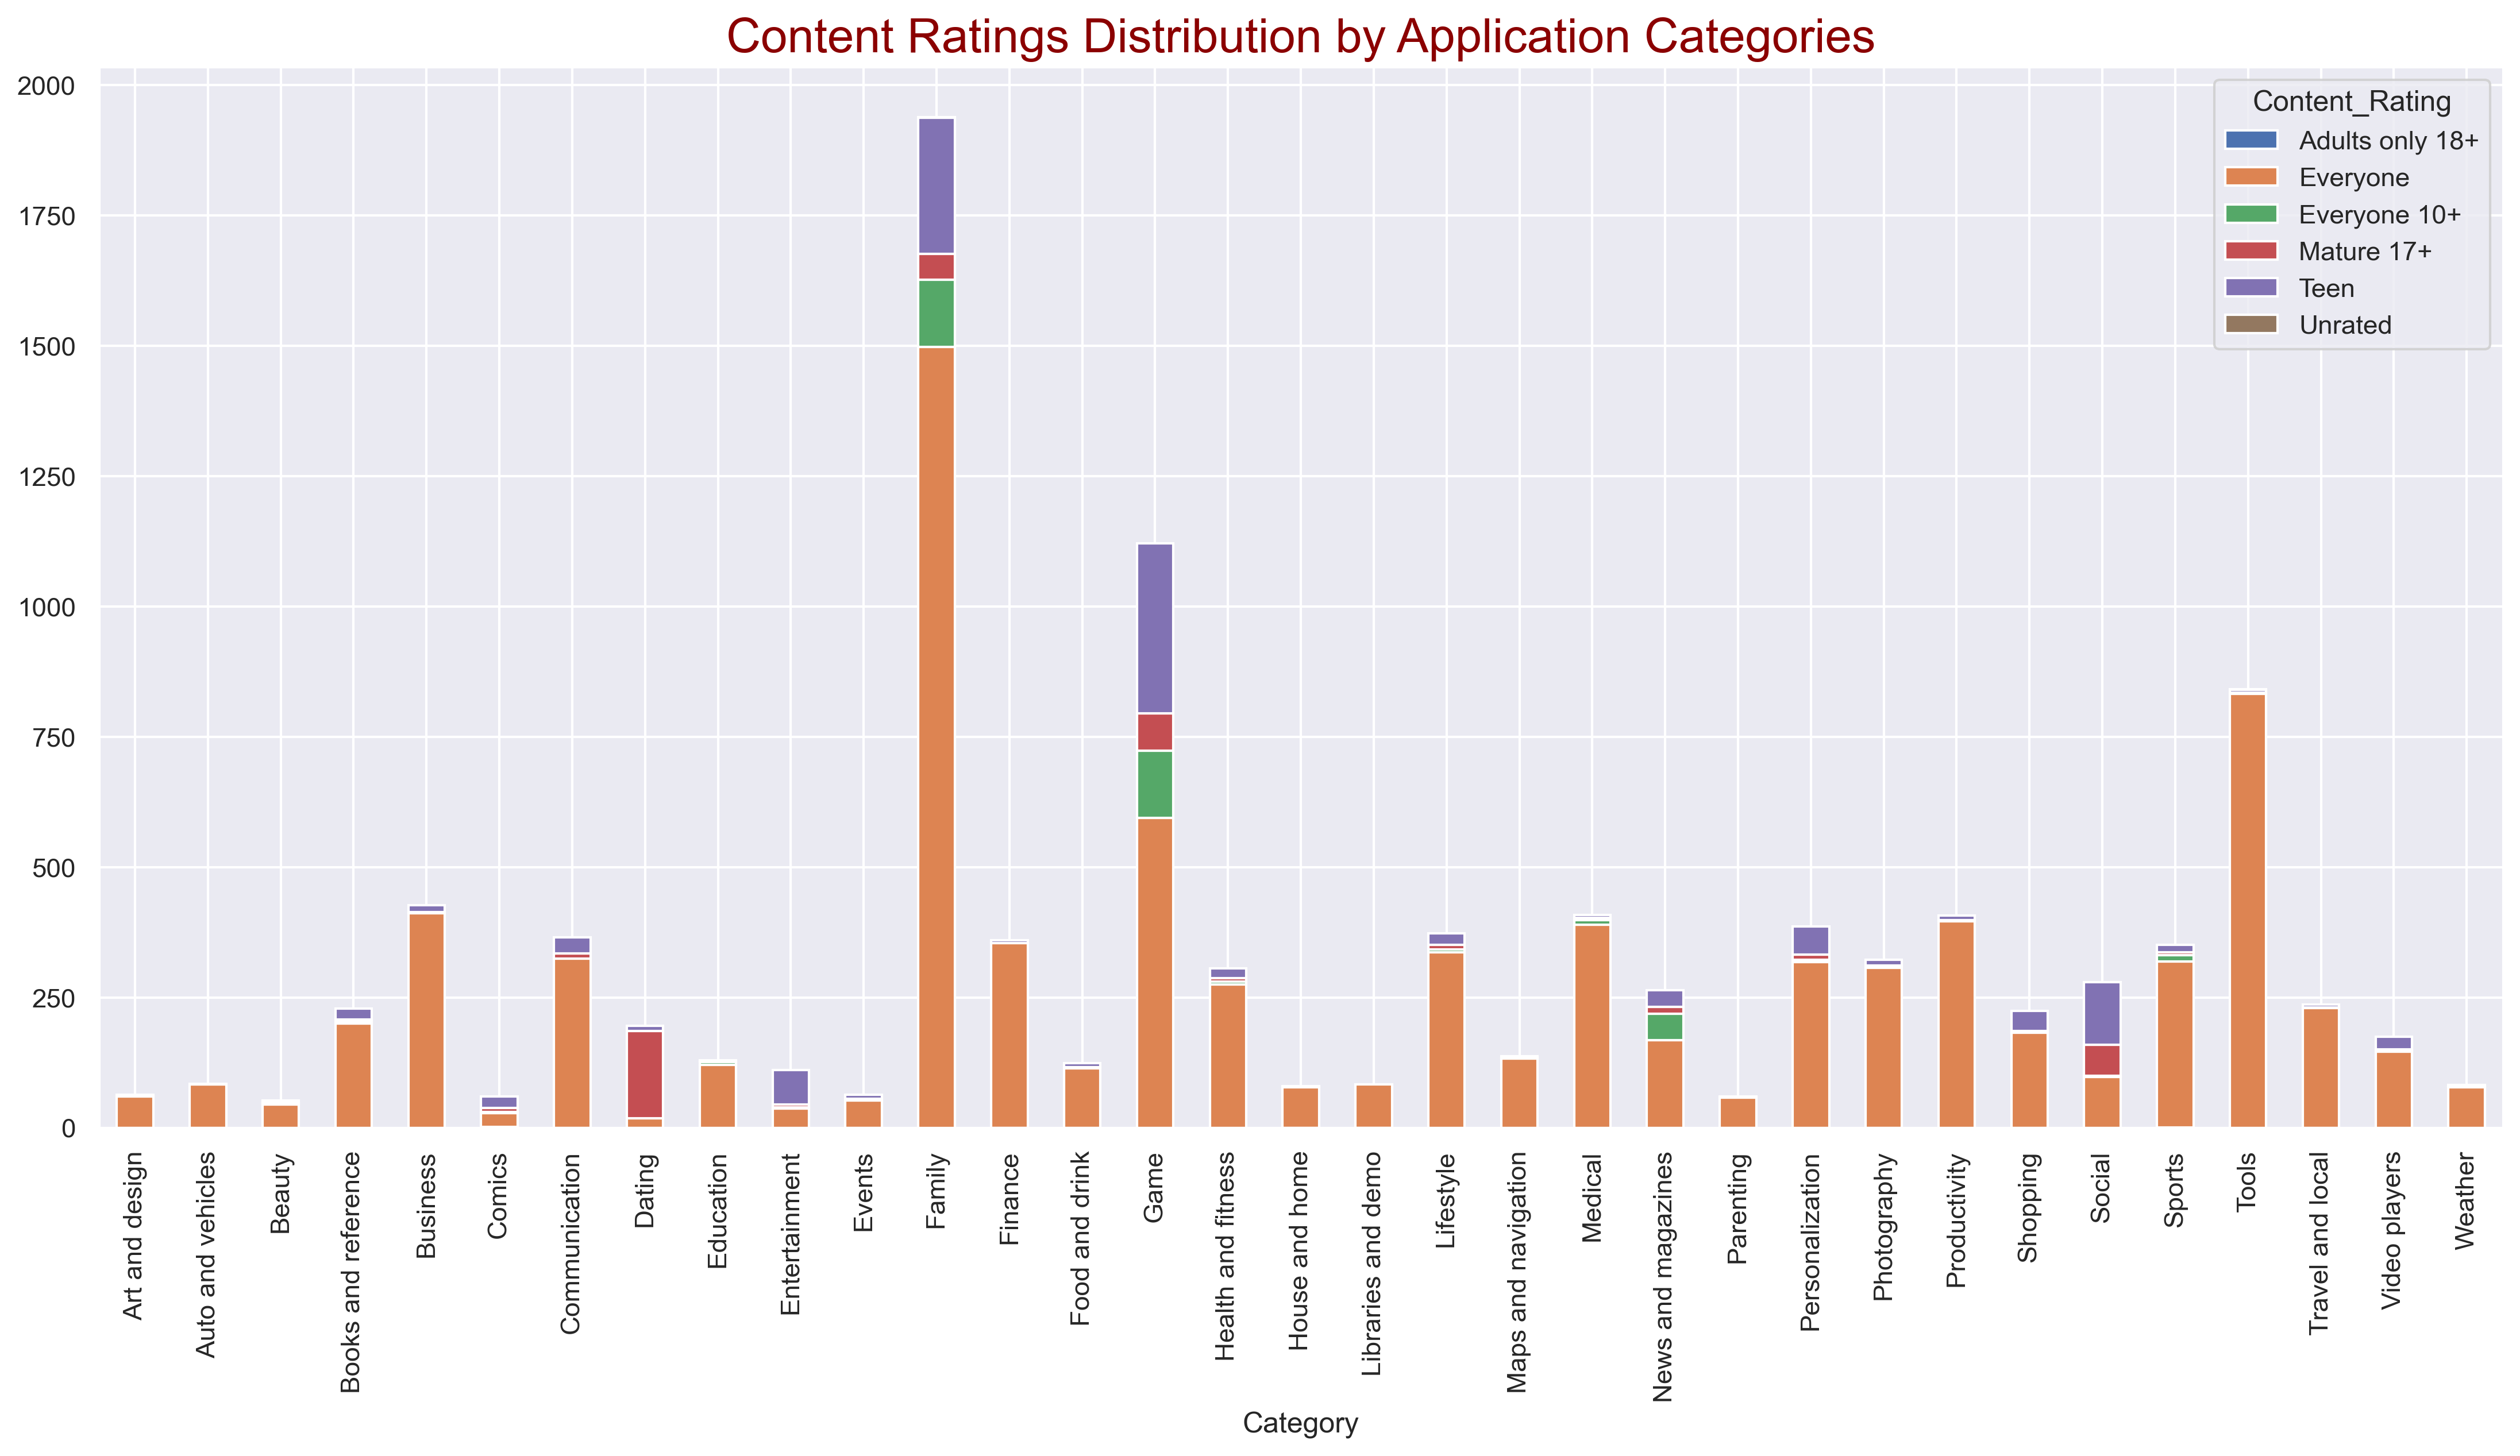

In [89]:
content_category_cross = pd.crosstab( df['Category'], df['Content_Rating'])

content_category_cross.plot(kind='bar', stacked=True, figsize=(18,8))

plt.title("Content Ratings Distribution by Application Categories", fontdict={'fontsize': 20, 'color': 'darkred'});

## <font color='green'> <b>How do App Installations Vary Across Different Android Versions?</b><font color='black'>

In [90]:
df['Android_Ver'].value_counts()

Android_Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1335
Varies with device    1220
4.4 and up             894
2.3 and up             642
5.0 and up             546
4.2 and up             386
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             235
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

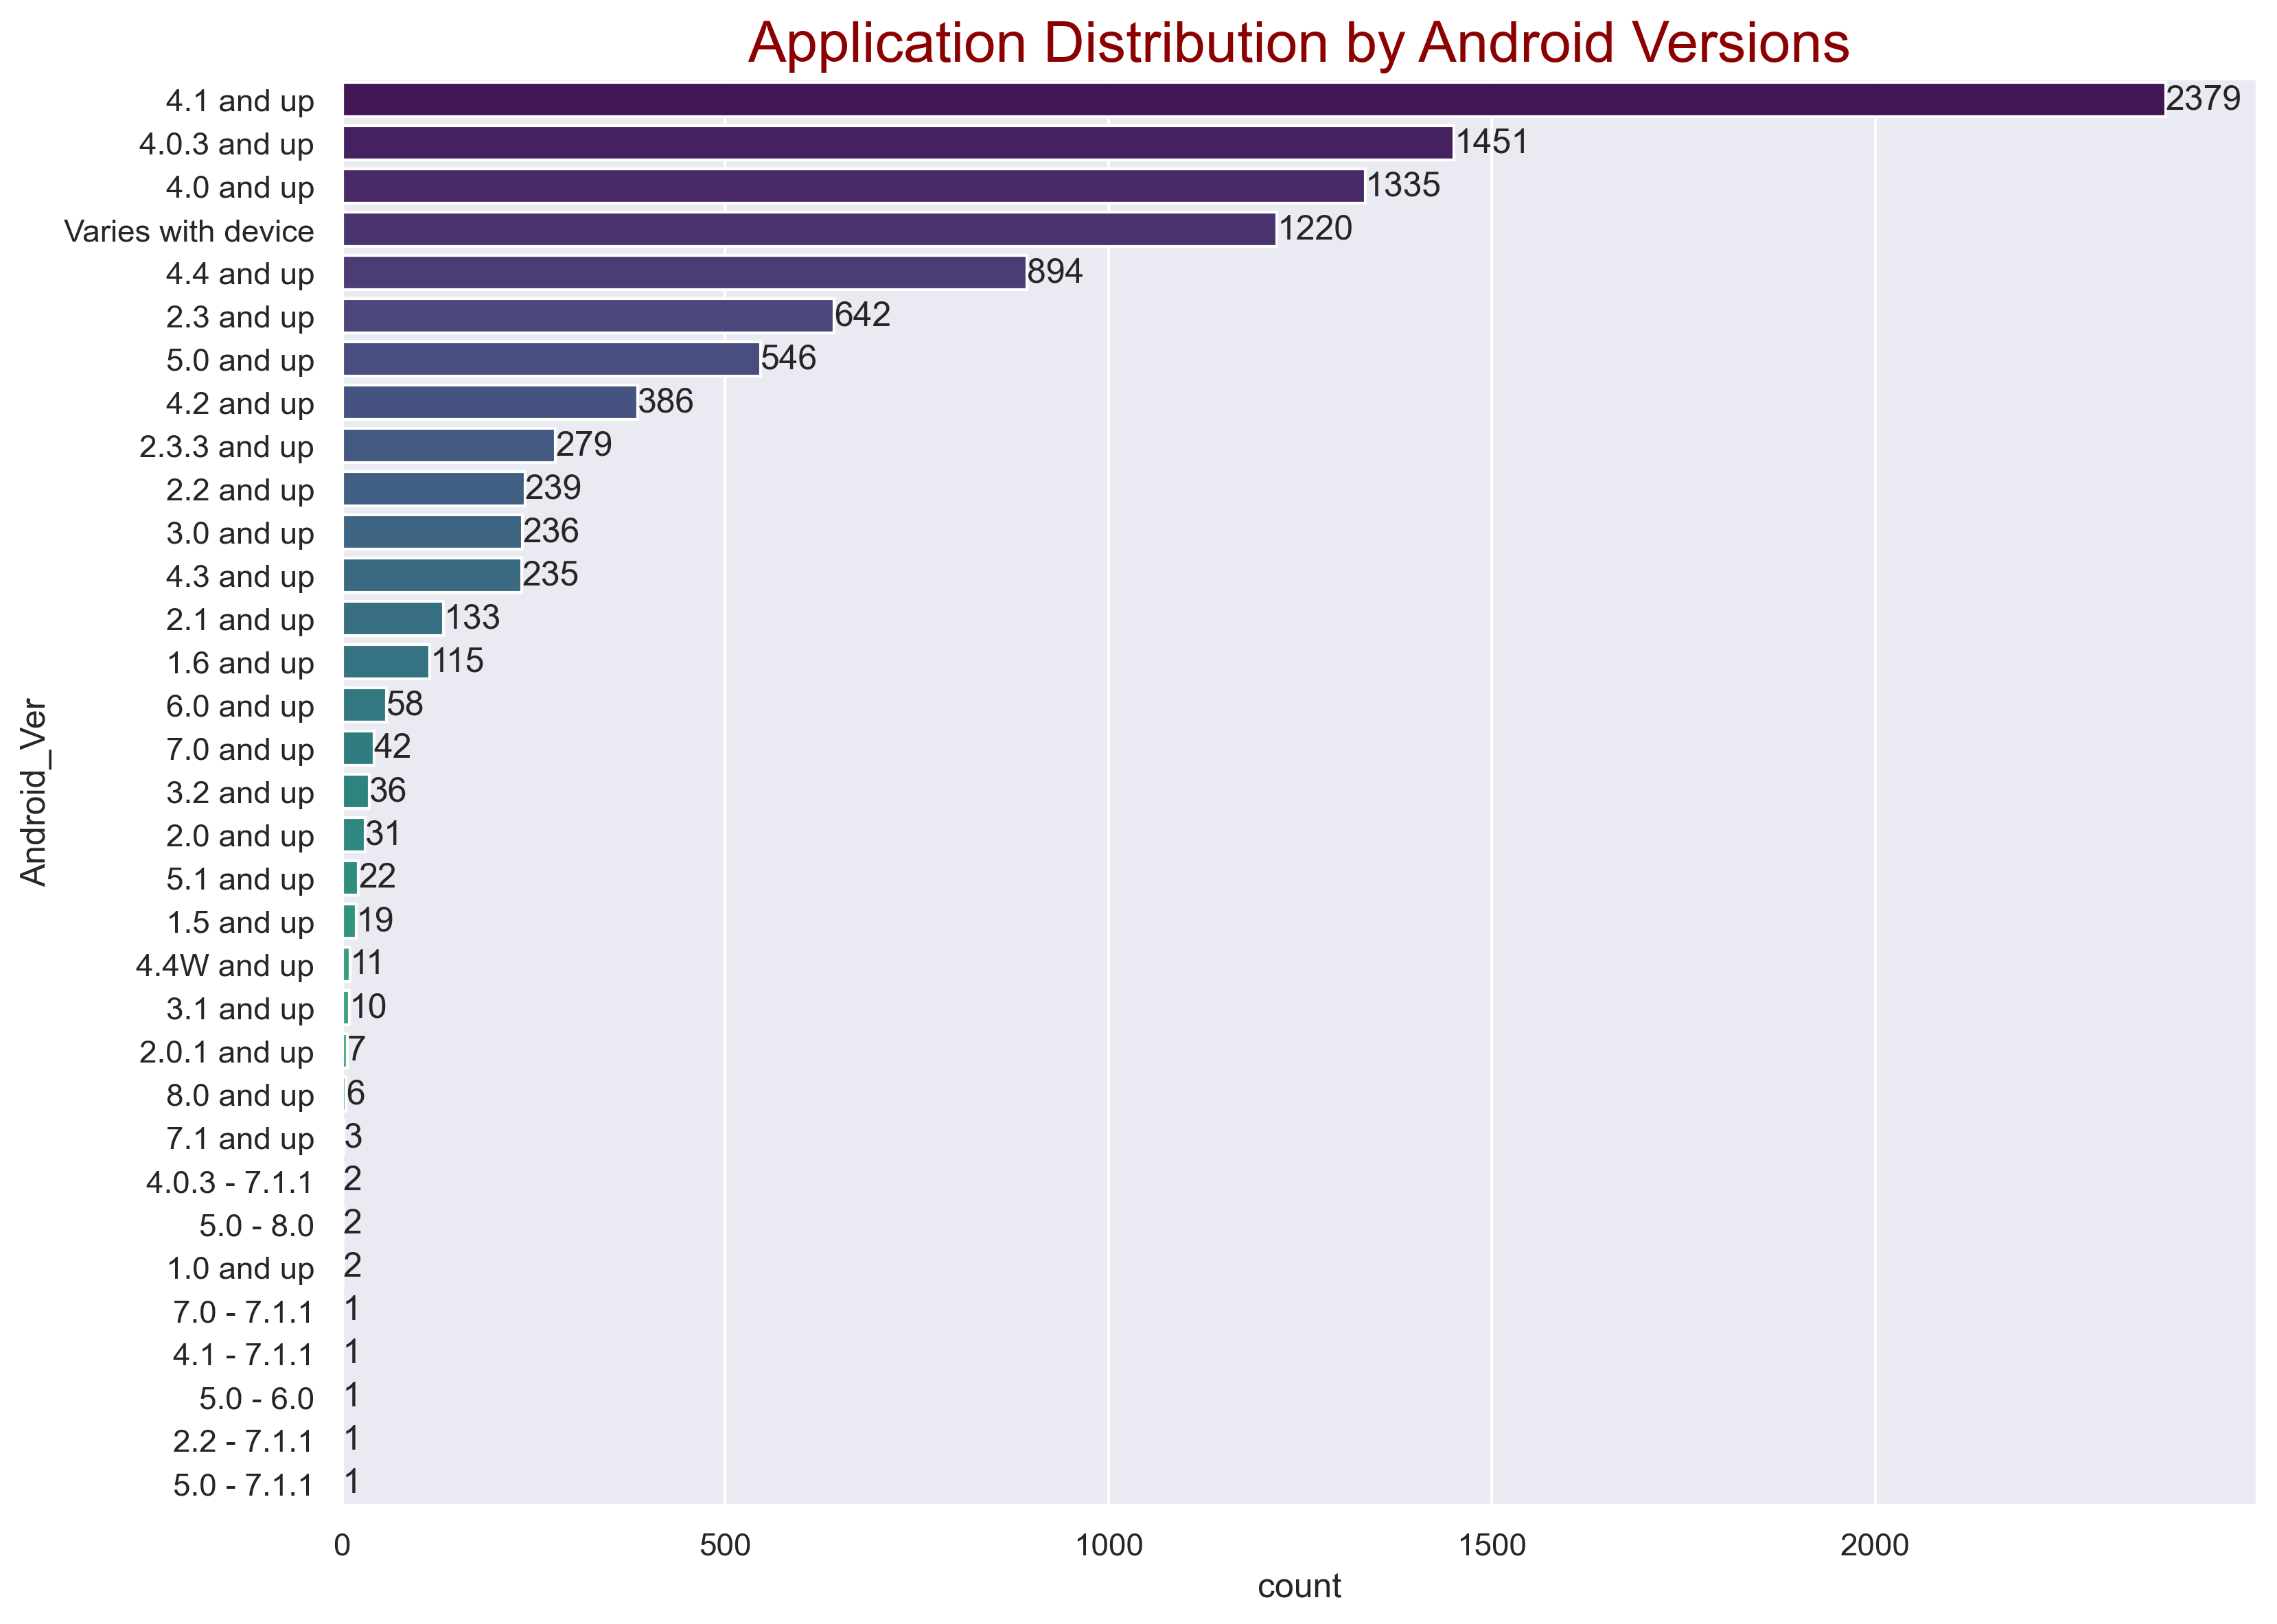

In [91]:
sorted_order = df['Android_Ver'].value_counts().index

ax = sns.countplot(data=df, y='Android_Ver', order=sorted_order, palette='viridis')

plt.title("Application Distribution by Android Versions",
          fontdict={
              'fontsize': 20,
              'color': 'darkred'
          })

for container in ax.containers:
    ax.bar_label(container)